## Assignment Part 1: Advanced Regression - Housing Price Using Regularisation

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
### Key Objectives
The company wants to know:
- Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

- To model the price of houses with the available independent variables. 
- To be used by the management to understand how exactly the prices vary with the variables. 
- To formulate the strategy of the firm and concentrate on areas that will yield high returns. 
- Way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from csv
Housing_price = pd.read_csv("c:/Ashwani/Upgrad/Machine Learning 2/Assignment/train.csv")
Housing_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Exploratory Data Analysis

In [3]:
Housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
Housing_price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
Housing_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
#NaN represents absence of feature. Popluation None for these column values reprensenting absence of feature
columns_na = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
              "GarageQual", "GarageType","GarageFinish", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for col in columns_na:
    Housing_price[col]=Housing_price[col].fillna("NONE")

In [7]:
Housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Fixing missing values using median, mode and None
Housing_price['LotFrontage']= Housing_price['LotFrontage'].fillna(Housing_price['LotFrontage'].median())
Housing_price['MasVnrArea']= Housing_price['LotFrontage'].fillna(Housing_price['MasVnrArea'].median())
Housing_price['MasVnrType'] = Housing_price['MasVnrType'].replace(np.nan, 'None')  
Housing_price['Electrical'] = Housing_price['Electrical'].replace(np.nan, 'SBrkr')

In [9]:
Housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Mapping categorical columns as per Data dictionary 
Housing_price.MSSubClass = Housing_price.MSSubClass.map({
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

Housing_price['OverallQual']=Housing_price['OverallQual'].replace({
      10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
       
Housing_price['OverallCond']=Housing_price['OverallCond'].replace({ 
      10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [11]:
Housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [12]:
Housing_price.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0  NONE      Reg         Lvl    AllPub  ...        0   NONE  NONE        NONE   
1  NONE      Reg         Lvl    AllPub  ...        0   NONE  NONE        NONE   
2  NONE      IR1         Lvl    AllPub  ...        0   NONE  NONE        NONE   
3  NONE      IR1         Lvl    AllPub  ...        0   NONE  NONE        NONE   
4  NONE      IR1         Lvl    AllPub  ...        0   NONE  NONE        NONE   

  MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
0       0      2   2008       WD        Normal     208500  
1       0      5   2007       WD        Normal     181500  
2       0      9   2008       WD        Normal     223500  
3       0      2   2006       WD       Abnorml     140000  
4       0     12   2008       WD        Normal     250000  

[5 rows x 81 columns]

In [13]:
# Creating a new column Remodeled, no represents 0, yes represents 1 or more

def CheckRemodel(row):
    if (row['YearBuilt'] == row['YearRemodAdd']): # Construction year is equal to remodel year
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']): # Construction year is less than remodel year
        return 1
    else:
        return 2
    
Housing_price['Remodeled'] = Housing_price.apply(CheckRemodel, axis=1)
Housing_price.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal  \
0  NONE      Reg         Lvl    AllPub  ...   NONE  NONE        NONE       0   
1  NONE      Reg         Lvl    AllPub  ...   NONE  NONE        NONE       0   
2  NONE      IR1         Lvl    AllPub  ...   NONE  NONE        NONE       0   
3  NONE      IR1         Lvl    AllPub  ...   NONE  NONE        NONE       0   
4  NONE      IR1         Lvl    AllPub  ...   NONE  NONE        NONE       0   

  MoSold YrSold SaleType SaleCondition SalePrice  Remodeled  
0      2   2008       WD        Normal    208500          0  
1      5   2007       WD        Normal    181500          0  
2      9   2008       WD        Normal    223500          1  
3      2   2006       WD       Abnorml    140000          1  
4     12   2008       WD        Normal    250000          0  

[5 rows x 82 columns]

In [14]:
# Caluclate house age at the time of selling based on Year built or remodel date

def GetHouseAge(row):
    if (row['Remodeled'] == 0):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
    
Housing_price['HouseAge'] = Housing_price.apply(GetHouseAge, axis=1)

In [15]:
# Calculate new or old garage
Housing_price['GarageYrBlt'] = Housing_price['GarageYrBlt'].fillna(0)
Housing_price['GarageYrBlt'] = Housing_price['GarageYrBlt'].astype(int)

def GetGarageAge(row):
    if row == 0: # these would imputed rows with zero
        return 0
    elif row >=1900 and row < 2002: # Considering last 20 years properties as new(1) and rest are old(0)
        return 0
    else:
        return 1
Housing_price['GarageAge'] = Housing_price['GarageYrBlt'].apply(GetGarageAge)

In [16]:
Housing_price.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','GarageYrBlt', 'Id'], axis = 1, inplace = True)
Housing_price.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities LotConfig  ... Fence MiscFeature  \
0  NONE      Reg         Lvl    AllPub    Inside  ...  NONE        NONE   
1  NONE      Reg         Lvl    AllPub       FR2  ...  NONE        NONE   
2  NONE      IR1         Lvl    AllPub    Inside  ...  NONE        NONE   
3  NONE      IR1         Lvl    AllPub    Corner  ...  NONE        NONE   
4  NONE      IR1         Lvl    AllPub       FR2  ...  NONE        NONE   

  MiscVal MoSold SaleType SaleCondition SalePrice Remodeled HouseAge GarageAge  
0       0      2       WD        Normal    208500         0        5         1  
1       0      5       WD        Normal    181500         0       31         0  
2       0      9       WD        Normal    223500         1        6         0  
3       0      2       WD       Abnorml    140000         1       36         0  
4       0     12       WD        Normal    250000         0        8         0  

[5 rows x 79 columns]

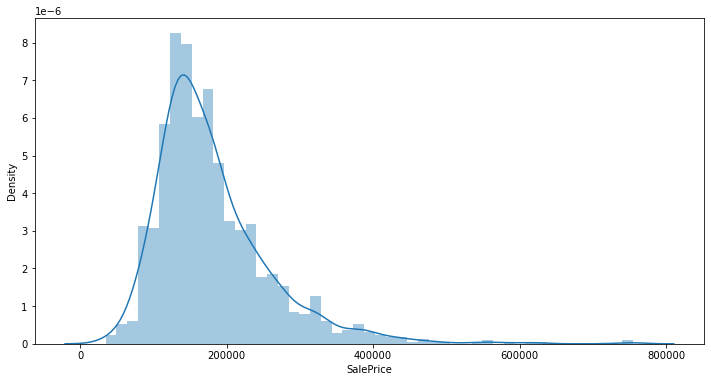

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(Housing_price['SalePrice'])
plt.show()

#### Transforming using Log Transformation

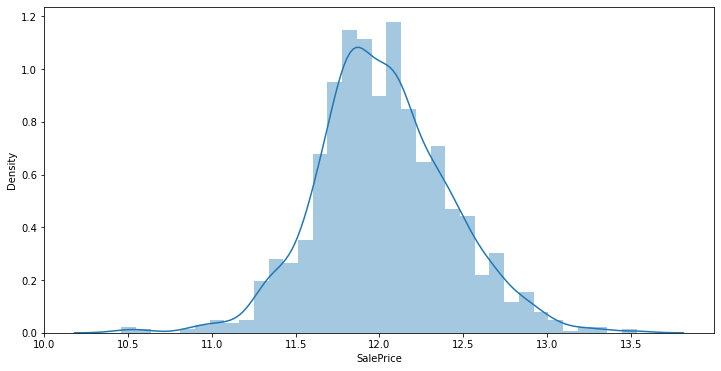

In [18]:
# Applying log transform of target variable with log scale
Housing_price['SalePrice'] = np.log(Housing_price['SalePrice'])

plt.figure(figsize=(12,6))
sns.distplot(Housing_price['SalePrice'])
plt.show()

### Data Visualization

In [19]:
cat_cols = Housing_price.select_dtypes(include=['object']).columns
cont_cols = Housing_price.select_dtypes(include=['int64', 'float64']).columns

### Univariate Analysis - Continuous Columns

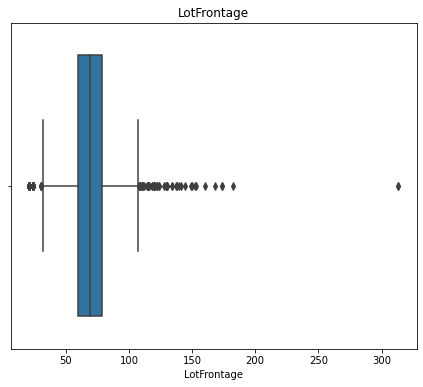

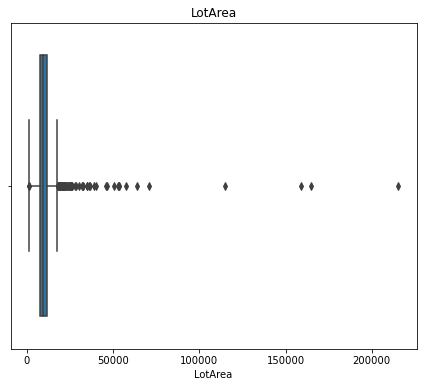

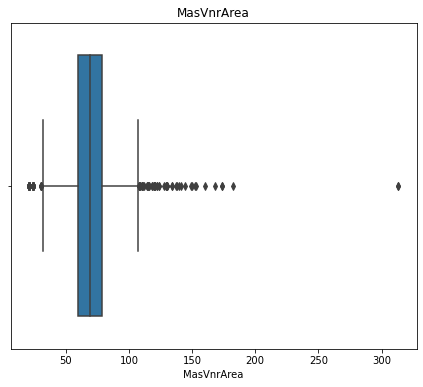

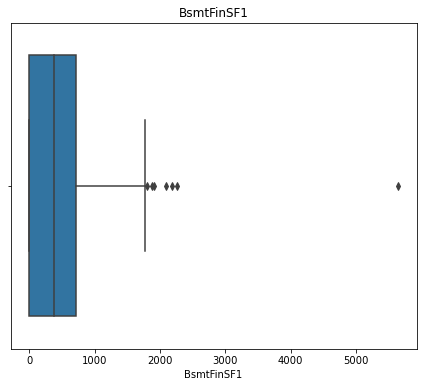

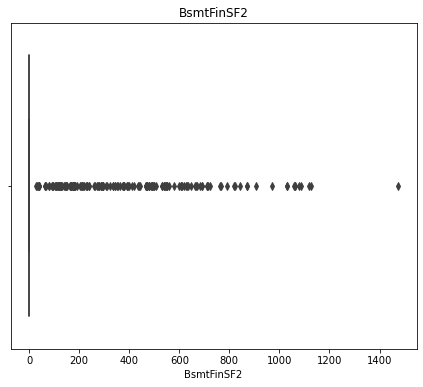

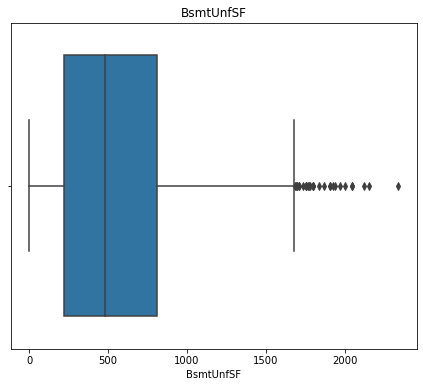

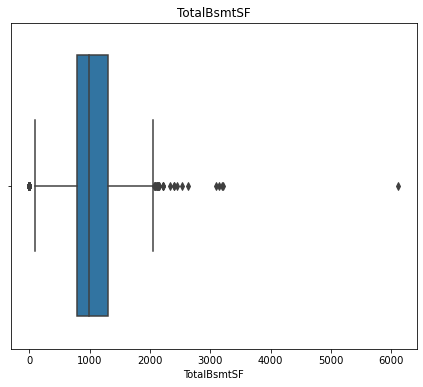

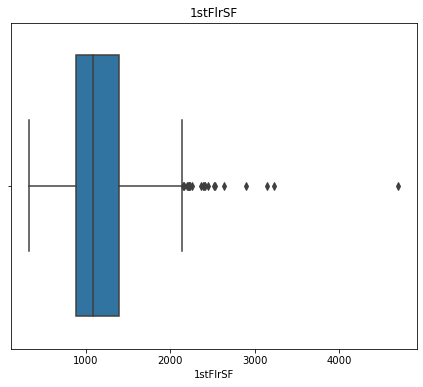

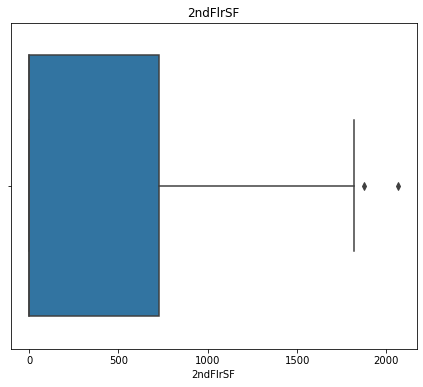

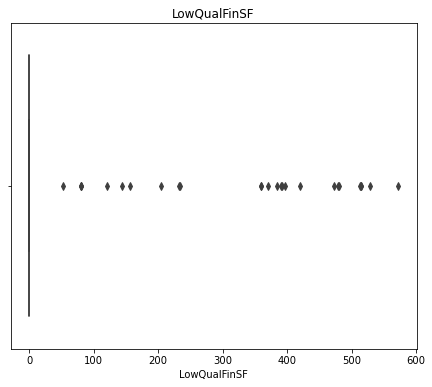

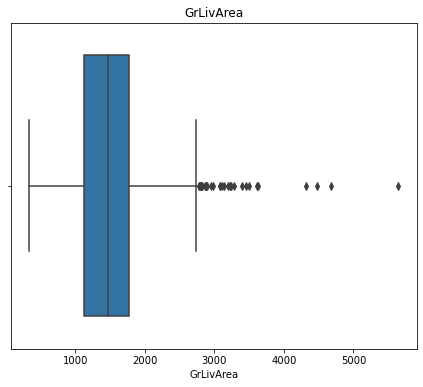

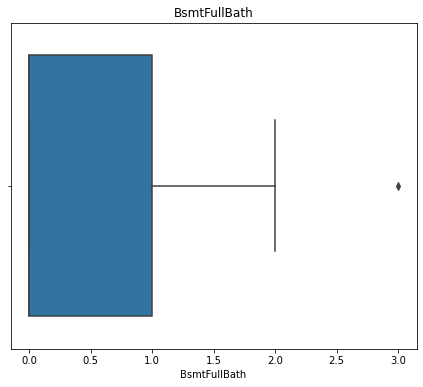

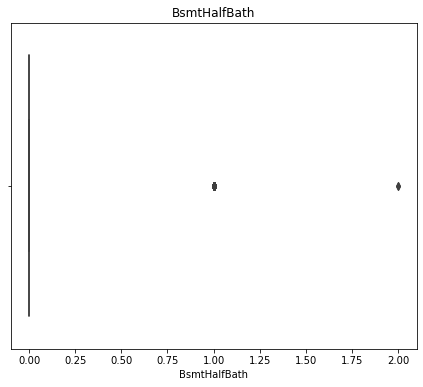

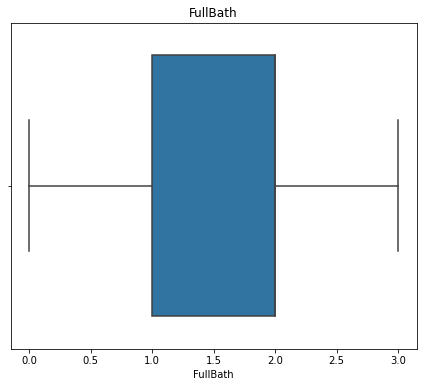

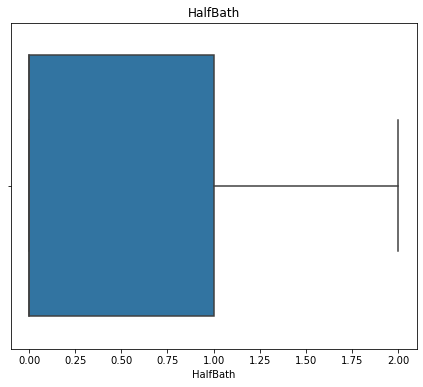

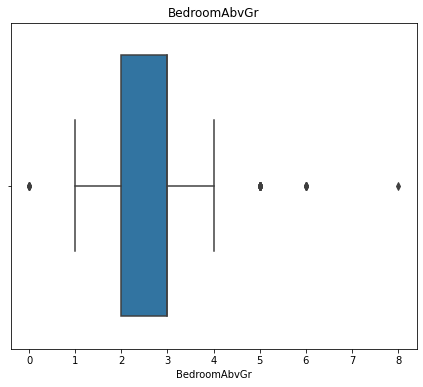

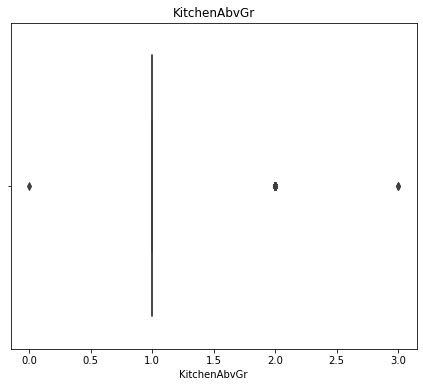

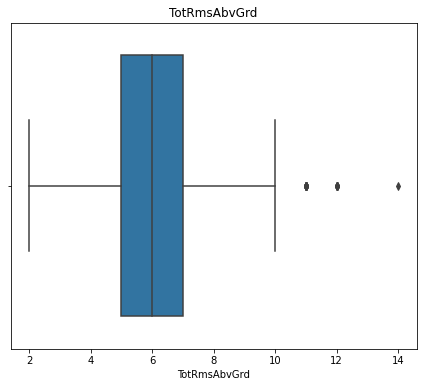

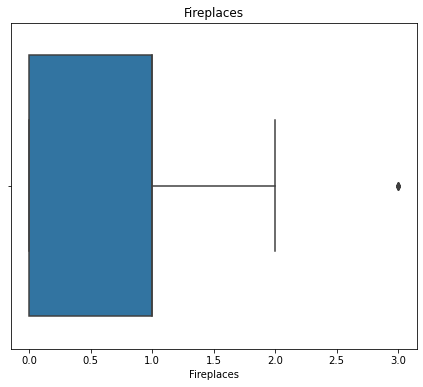

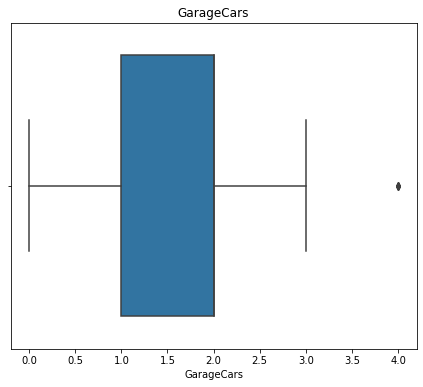

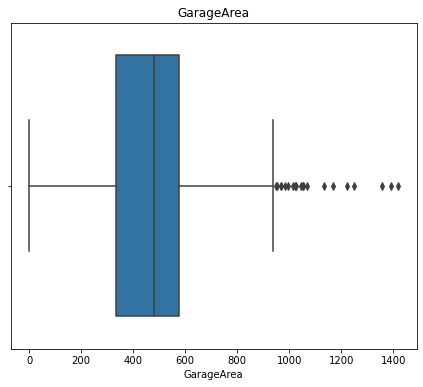

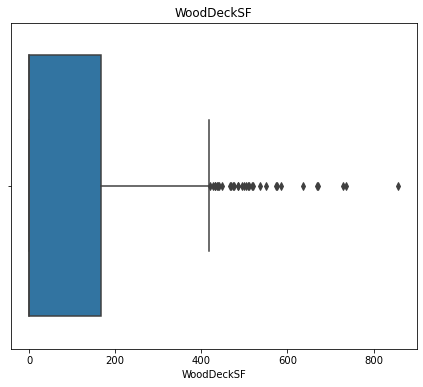

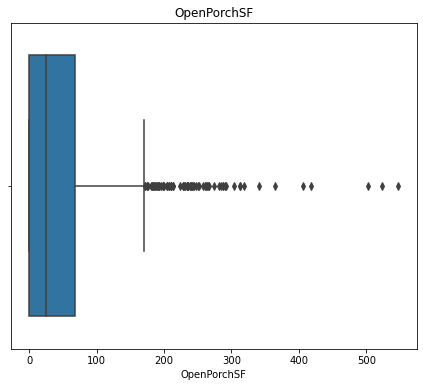

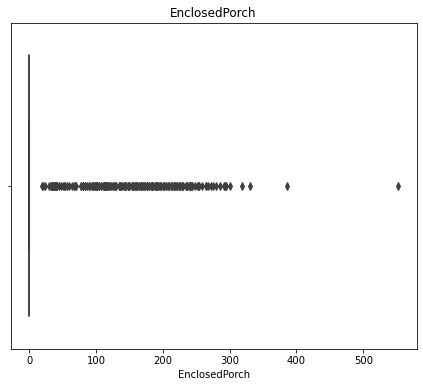

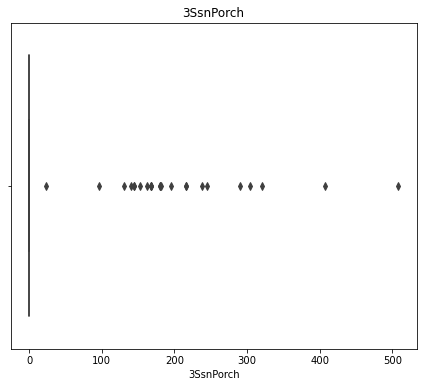

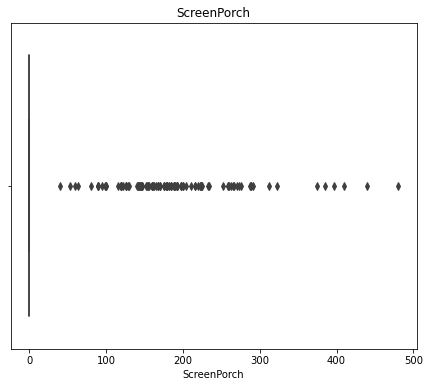

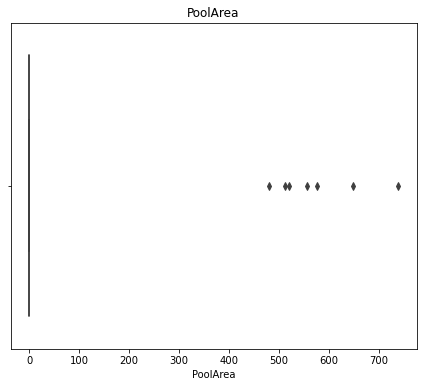

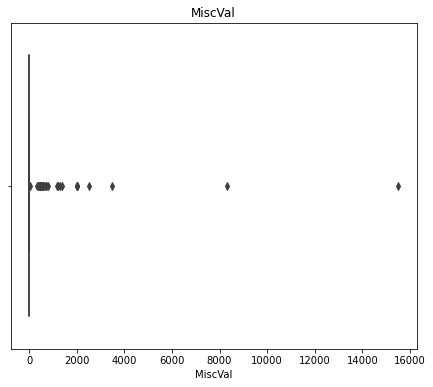

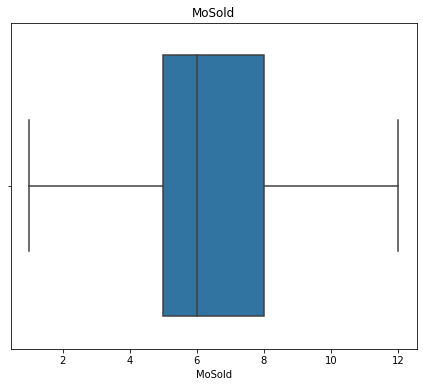

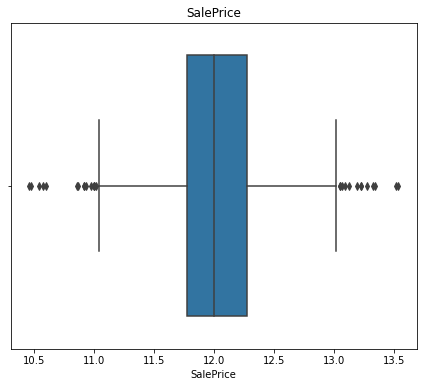

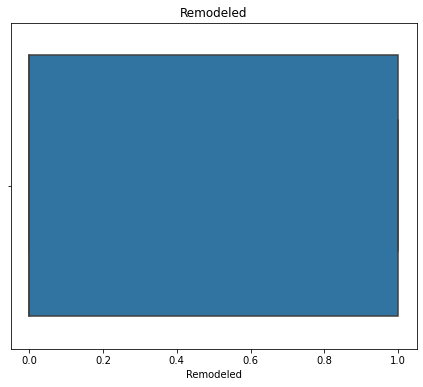

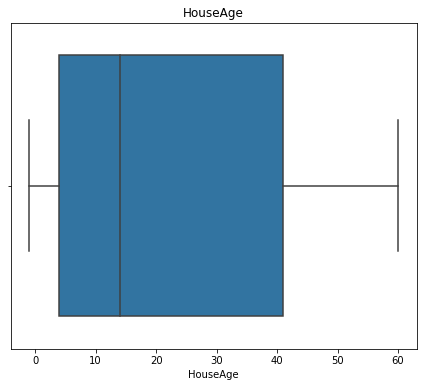

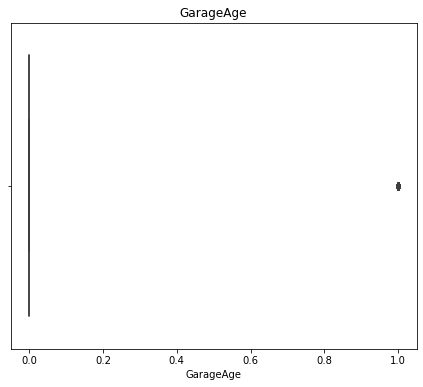

In [20]:
for col in cont_cols: 
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 12})
    sns.boxplot(Housing_price[col])
    plt.show()

### Since Most of columns have outliers, we need to fix outliers

In [21]:
def FixOutliers(df, num_cols):
    list = []
    for col in num_cols:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df
Housing_price = FixOutliers(Housing_price,cont_cols)

### Univariate Analysis - Categorical Columns

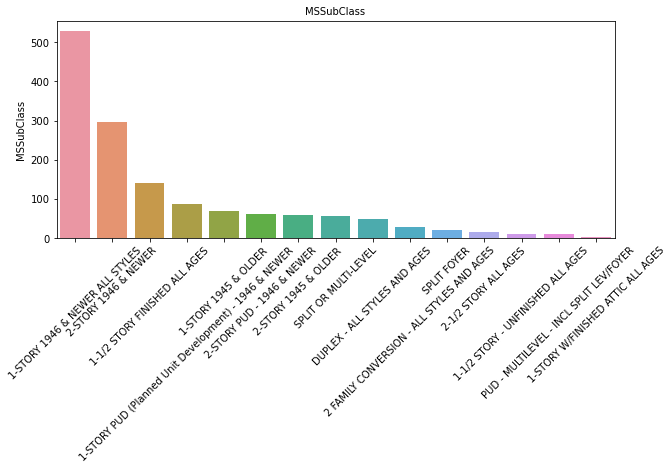

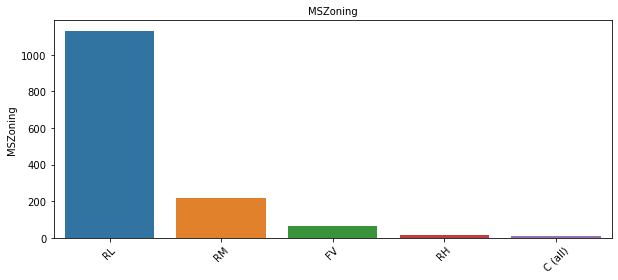

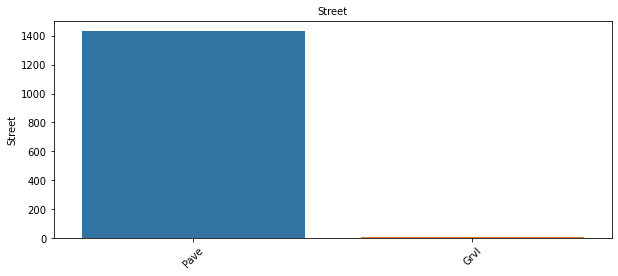

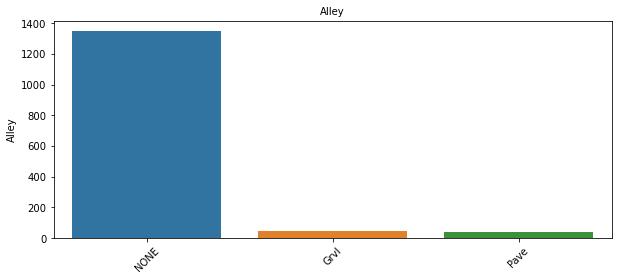

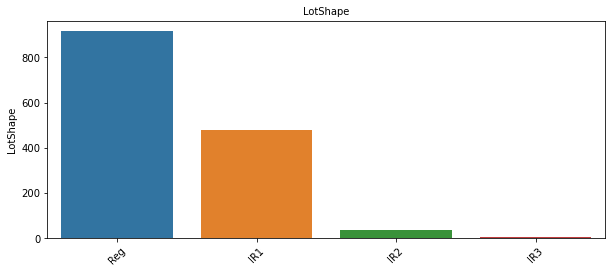

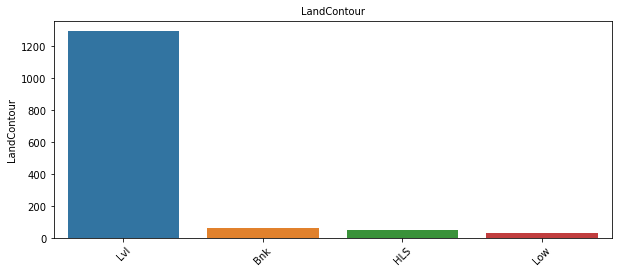

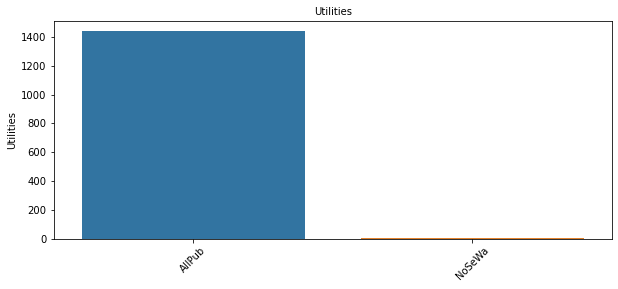

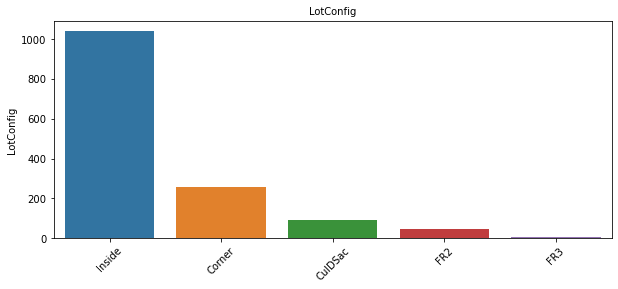

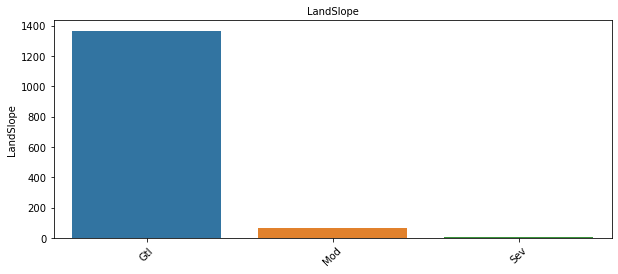

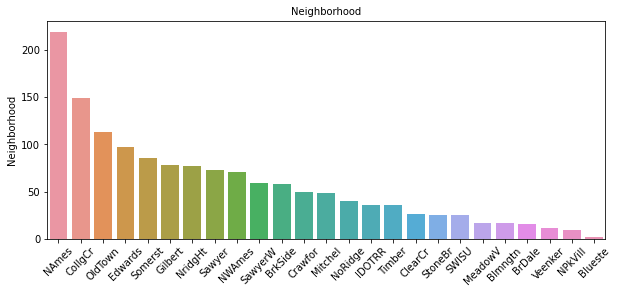

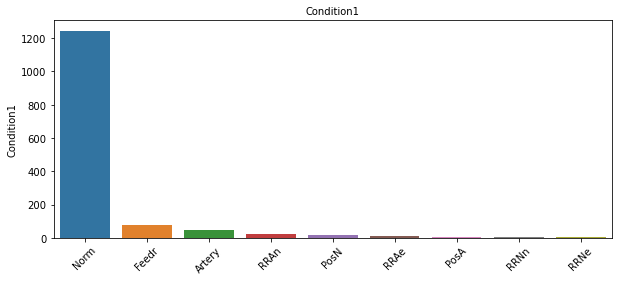

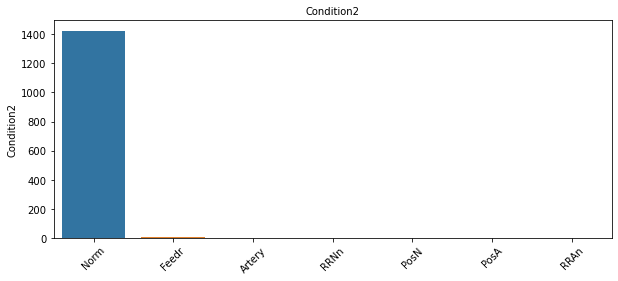

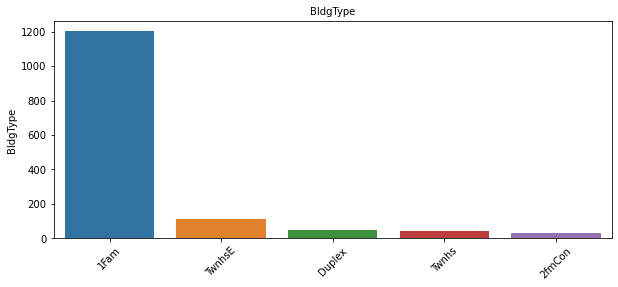

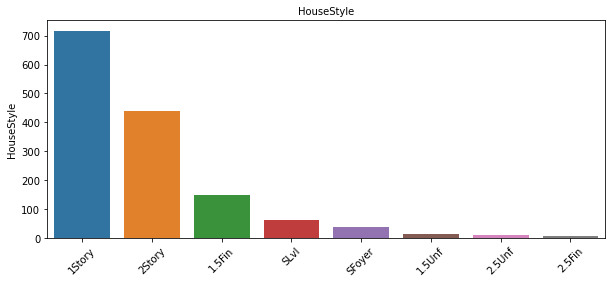

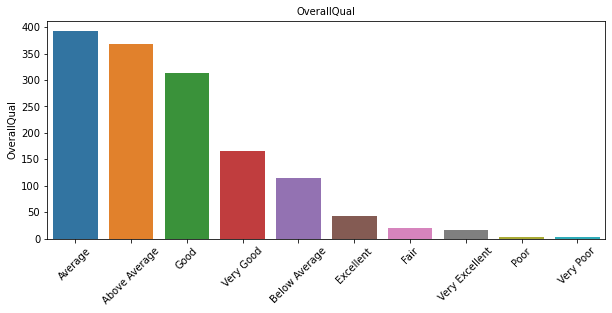

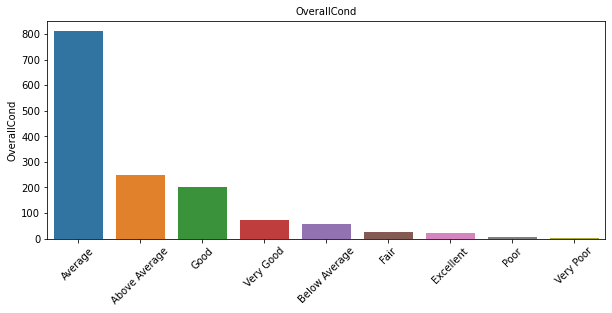

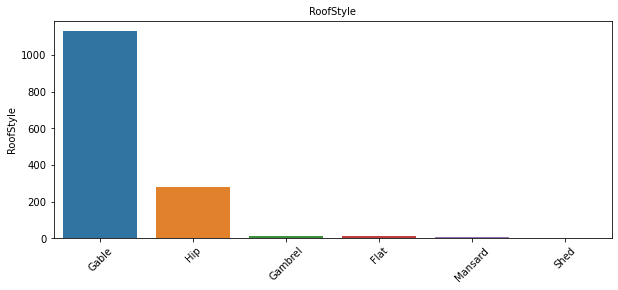

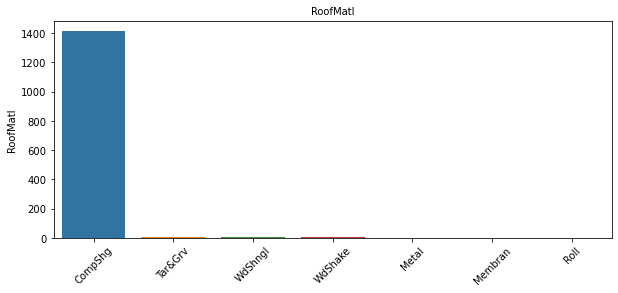

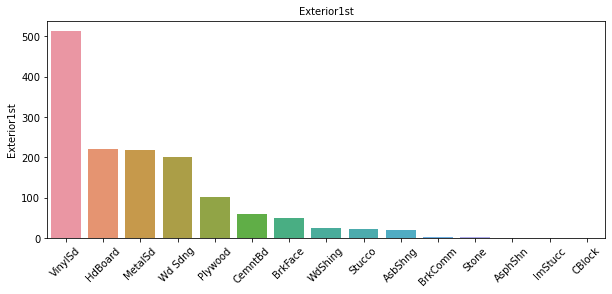

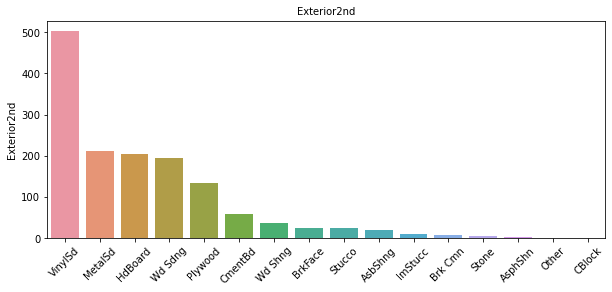

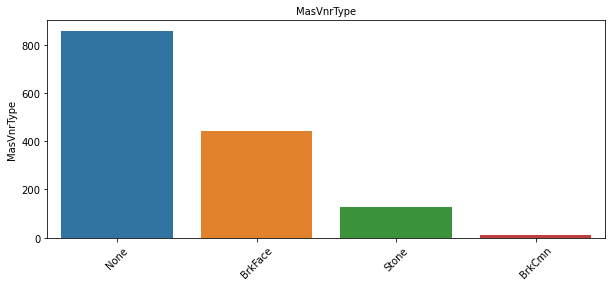

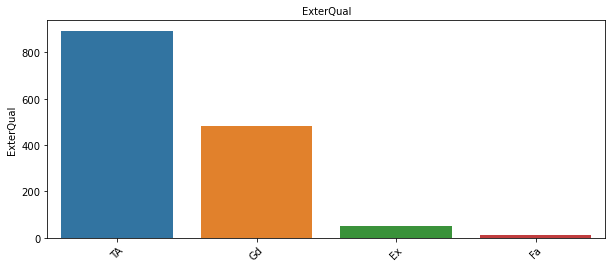

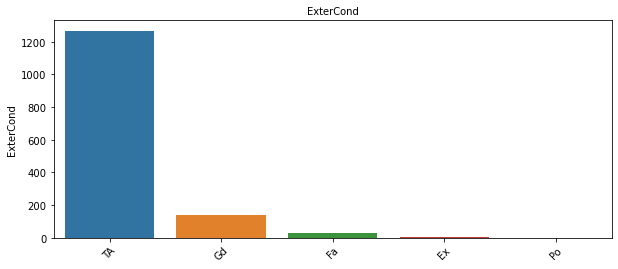

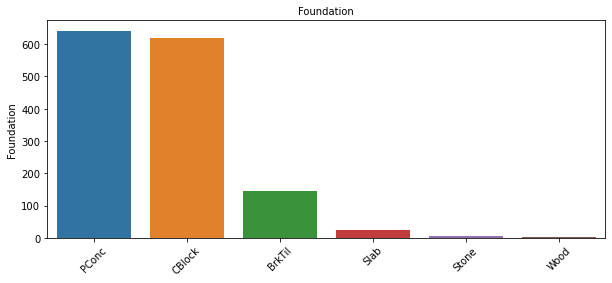

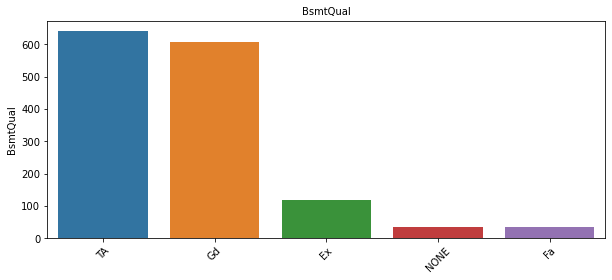

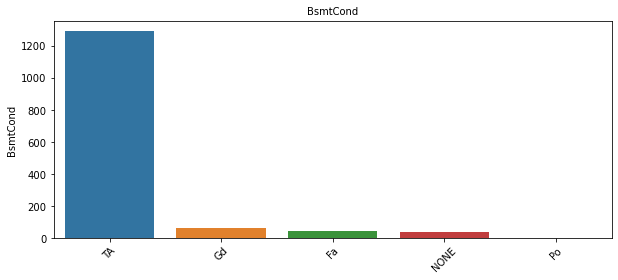

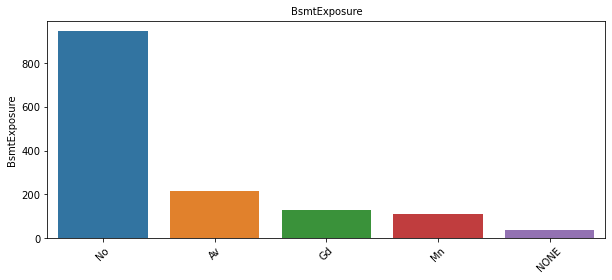

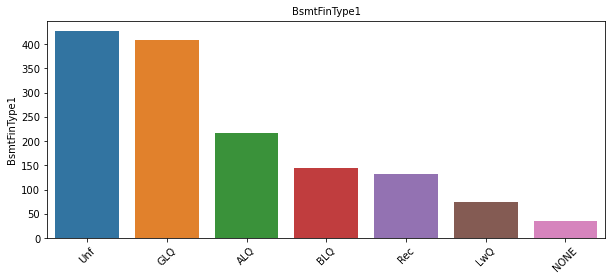

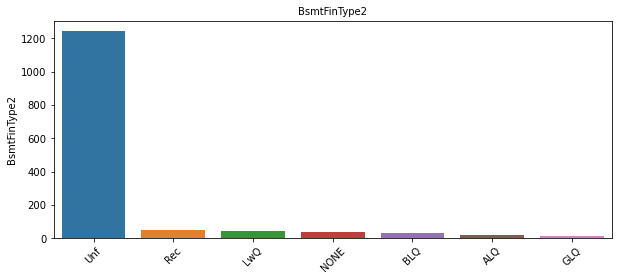

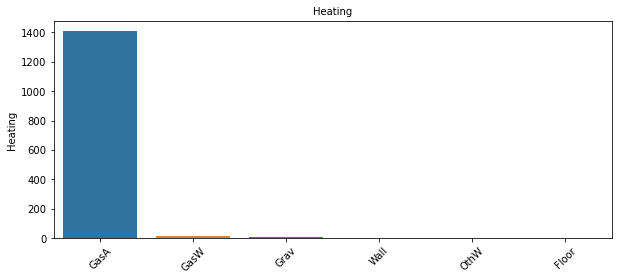

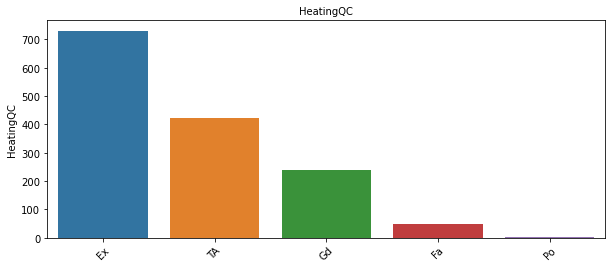

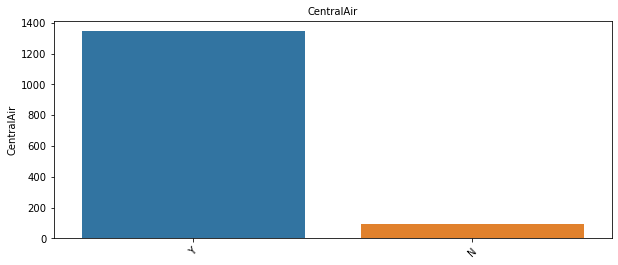

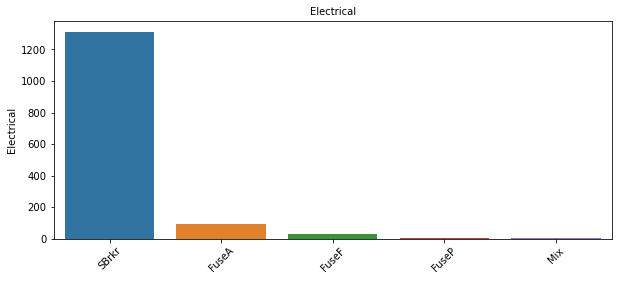

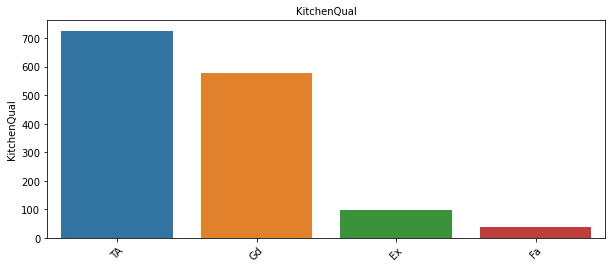

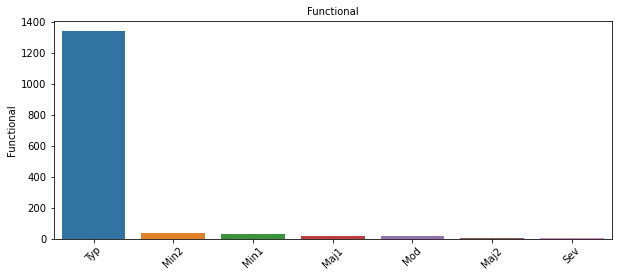

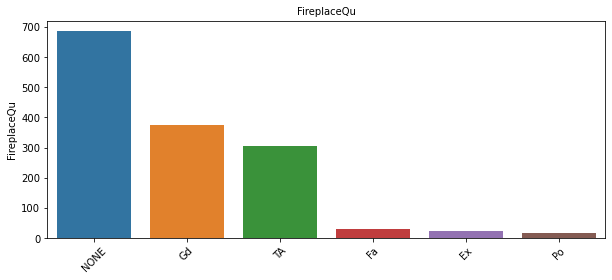

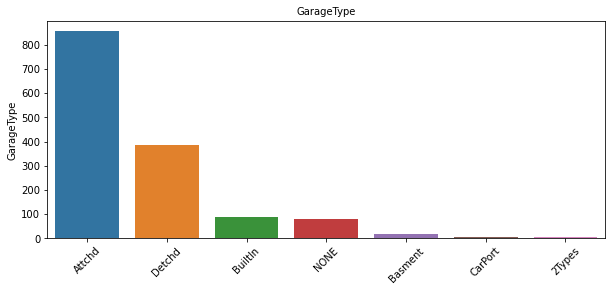

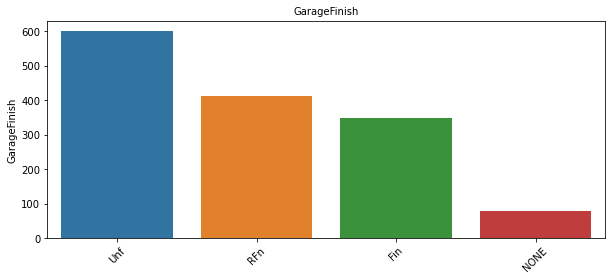

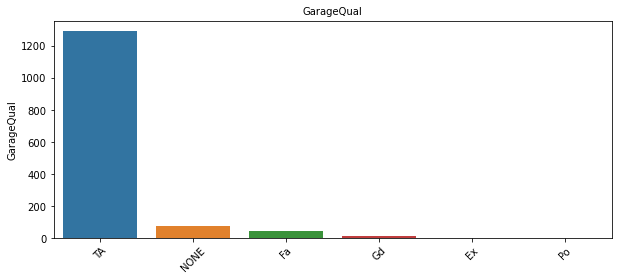

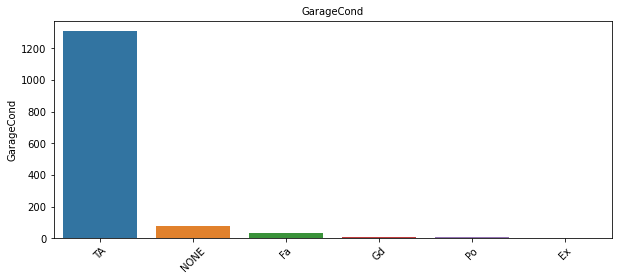

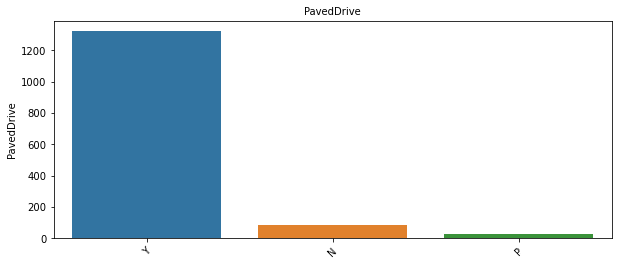

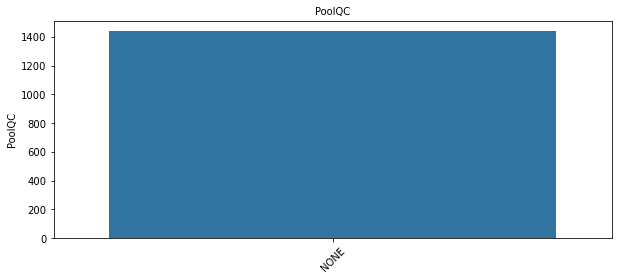

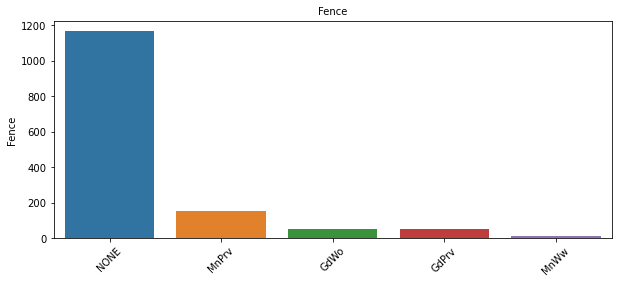

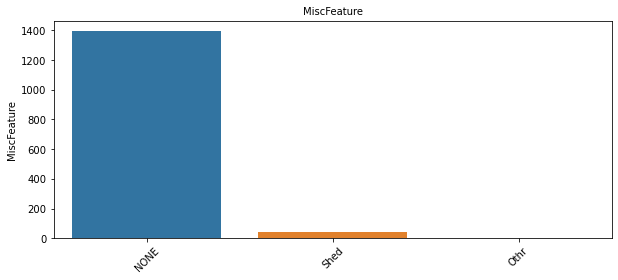

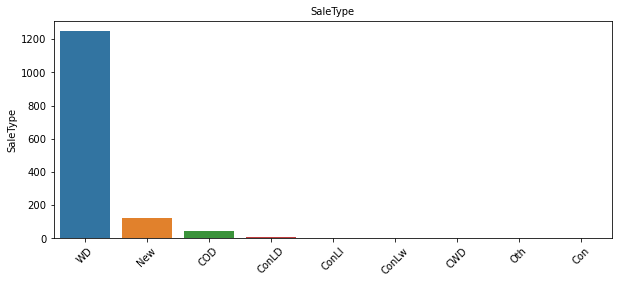

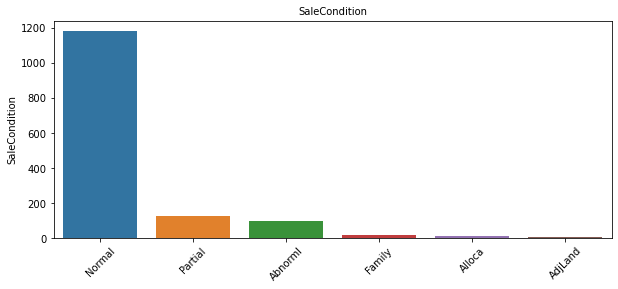

In [22]:
## Plot bar graph of categorical columns
for col in cat_cols:
    plt.figure(figsize=(10,4))
    plt.title(col, fontdict={'fontsize': 10})
    plt.xticks(rotation=45)
    sns.barplot(Housing_price[col].value_counts().index, Housing_price[col].value_counts())
    plt.show()
    

### Bivariate Analysis

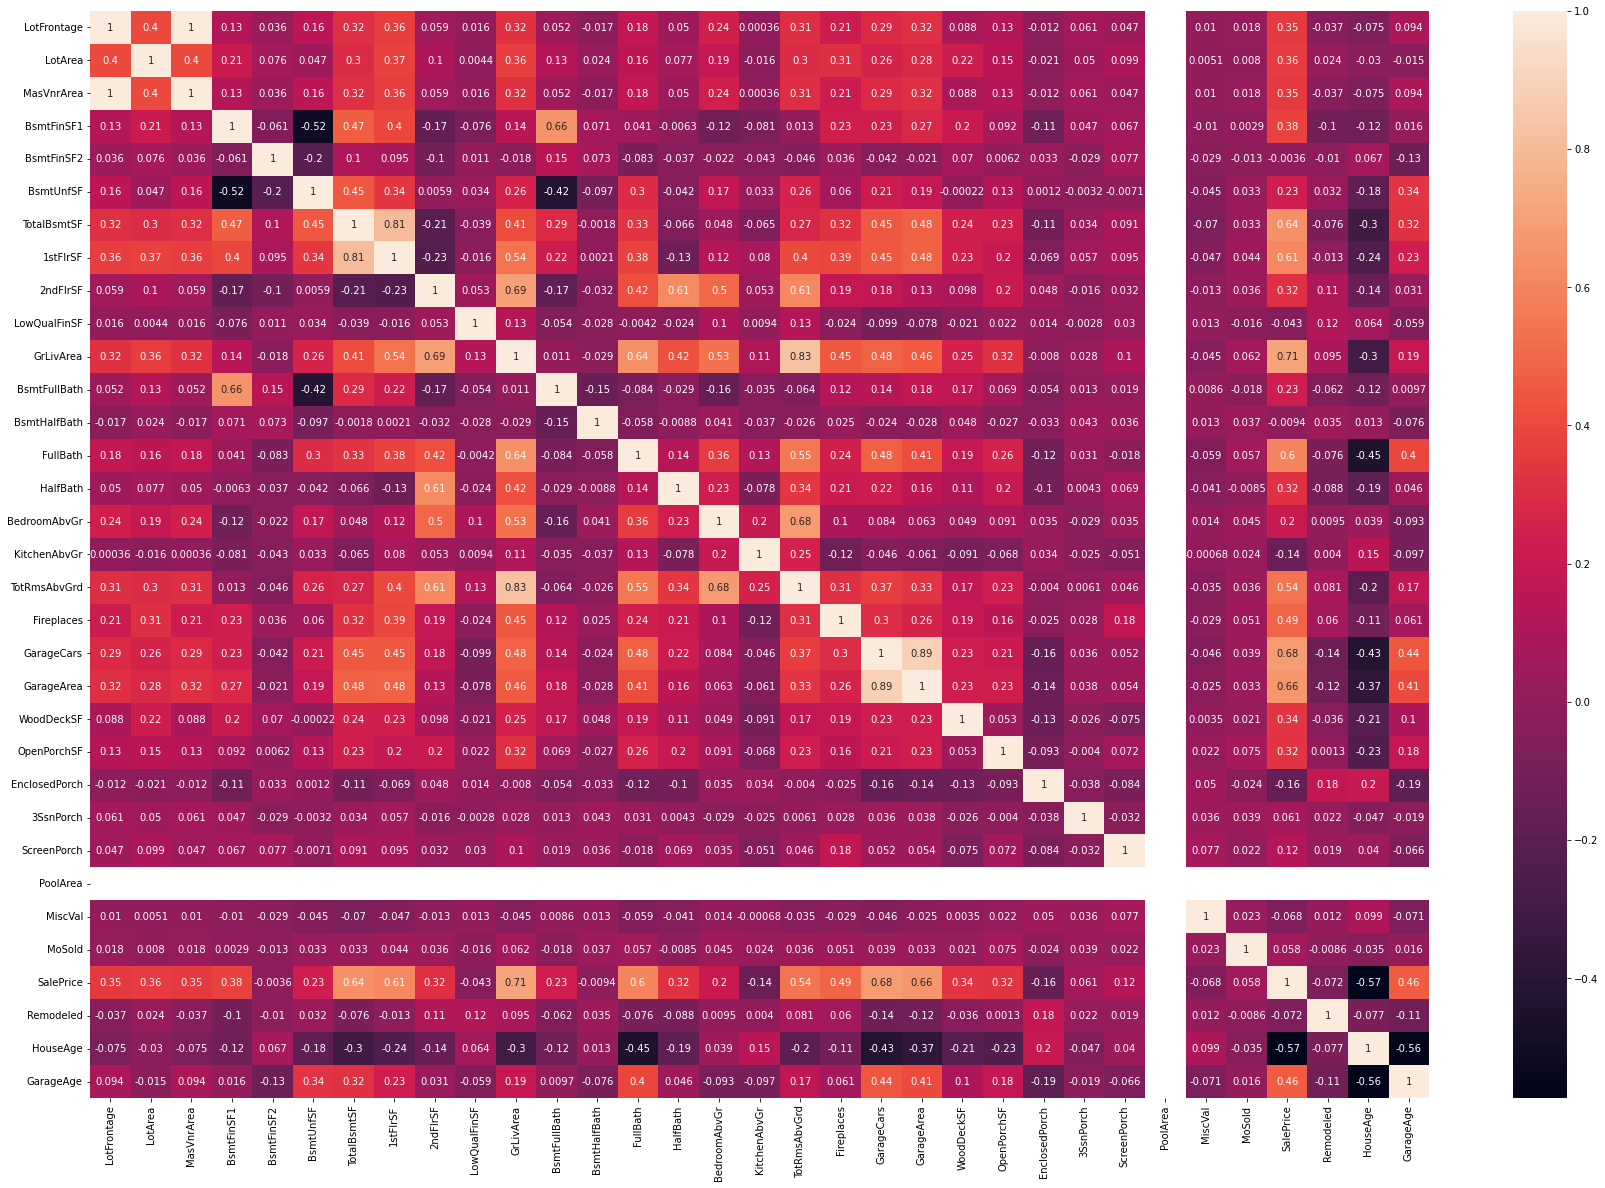

In [23]:
#checking corrleation of variables
plt.figure(figsize= (30,20))
sns.heatmap(Housing_price.corr(), annot=True)
plt.show()

<Figure size 7200x7200 with 0 Axes>

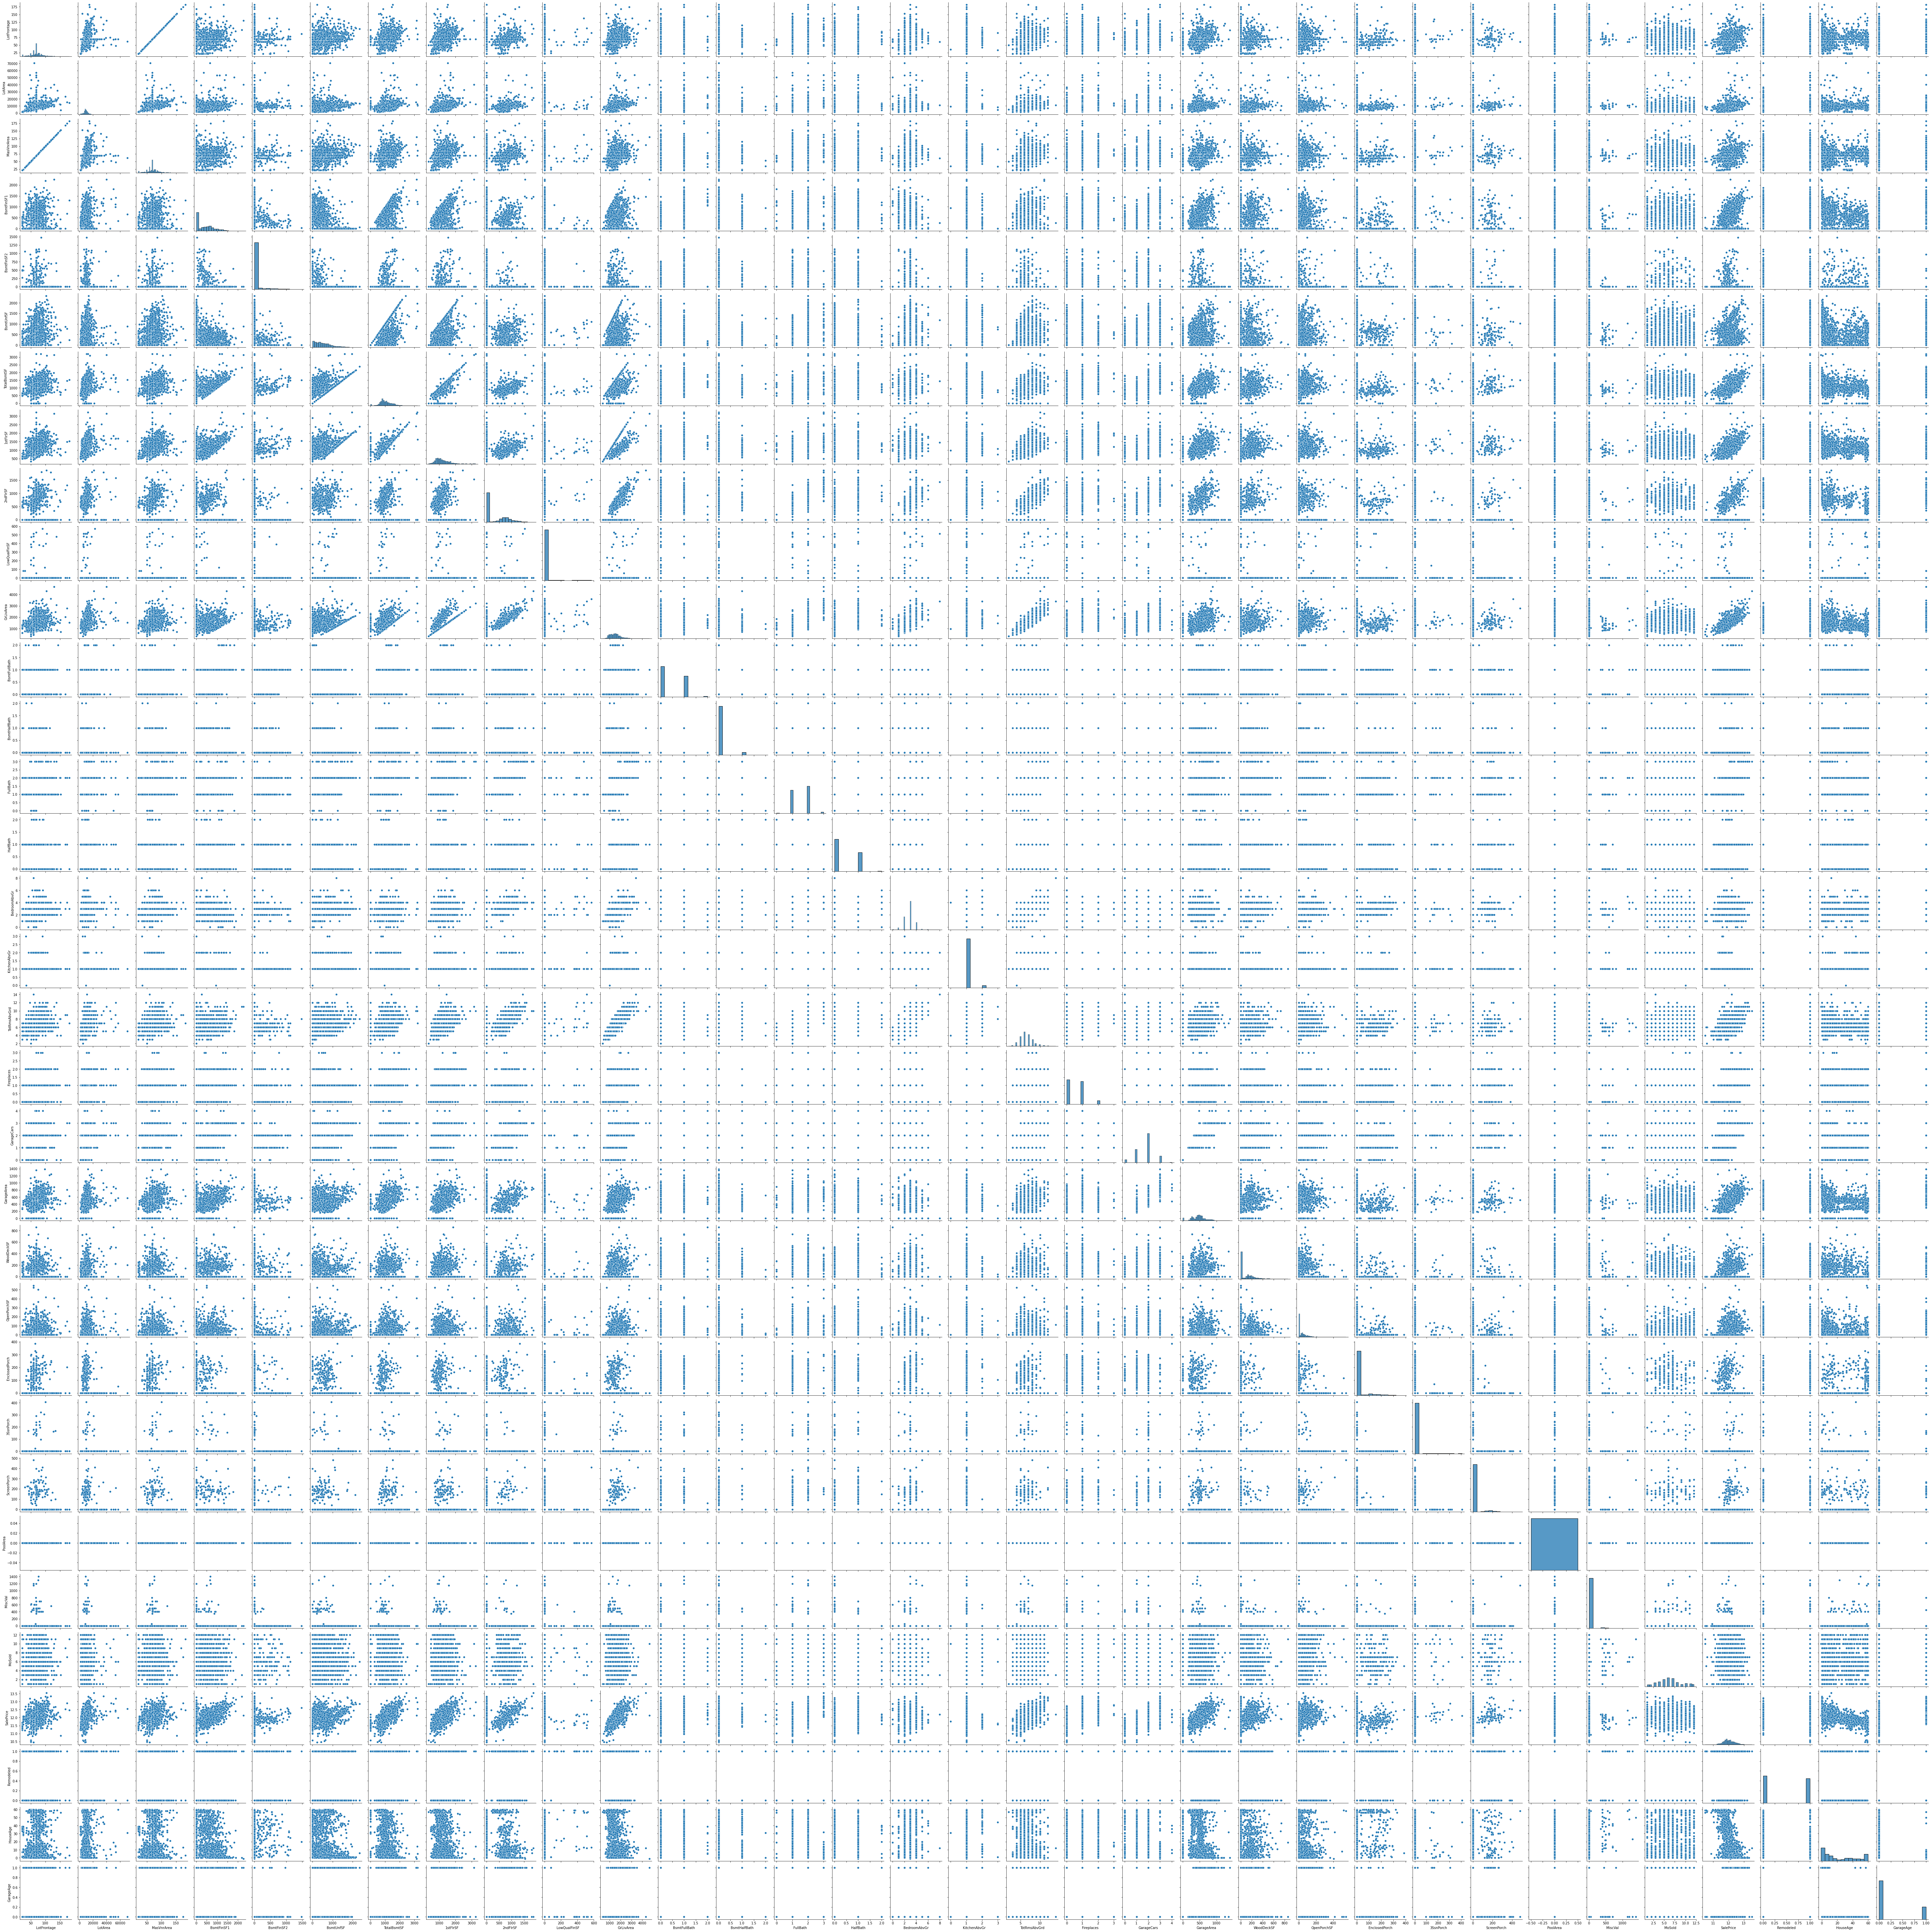

In [24]:
## pairplot of all the numeric variables
plt.figure(figsize=(100,100))
sns.pairplot(Housing_price[cont_cols])
plt.show()

### Create Dummies

In [25]:
Housing_price.shape

(1439, 79)

In [26]:
Housing_price = pd.get_dummies(data = Housing_price, columns = cat_cols,drop_first=True)

In [27]:
Housing_price.shape

(1439, 280)

### Model Building

In [28]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [29]:
X = Housing_price.drop('SalePrice',axis=1)
Y = Housing_price['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=25)

In [30]:
cont_cols = cont_cols.drop('SalePrice')

In [31]:
scaler = MinMaxScaler()
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_test[cont_cols] = scaler.transform(X_test[cont_cols])

In [32]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((1007, 279), (432, 279), (1007,), (432,))

In [33]:
X_train[cont_cols].head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
747      0.273292  0.149724    0.273292    0.000000         0.0   0.530822   
1032     0.298137  0.190625    0.298137    0.531513         0.0   0.139555   
719      0.298137  0.124098    0.298137    0.274685         0.0   0.191781   
1166     0.267081  0.132089    0.267081    0.000000         0.0   0.725171   
75       0.000000  0.004261    0.000000    0.242647         0.0   0.000000   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  OpenPorchSF  \
747      0.400776  0.450228  0.726073           0.0  ...     0.000000   
1032     0.432450  0.464840  0.642464           0.0  ...     0.100548   
719      0.313833  0.290868  0.000000           0.0  ...     0.000000   
1166     0.547511  0.621005  0.000000           0.0  ...     0.060329   
75       0.149321  0.087671  0.254125           0.0  ...     0.184644   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
747             1.0        0.0          0.0       0.0      0.0  0.363636   
1032            0.0        0.0          0.0       0.0      0.0  0.909091   
719             0.0        0.0          0.0       0.0      0.0  0.363636   
1166            0.0        0.0          0.0       0.0      0.0  0.090909   
75              0.0        0.0          0.0       0.0      0.0  0.909091   

      Remodeled  HouseAge  GarageAge  
747         1.0  0.100000        0.0  
1032        0.0  0.216667        0.0  
719         0.0  0.616667        0.0  
1166        0.0  0.033333        1.0  
75          0.0  0.600000        0.0  

[5 rows x 32 columns]

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

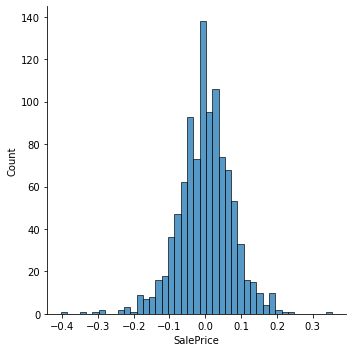

In [35]:
# residuals
res = y_train-y_train_pred
sns.displot(res)

In [36]:
r2_lr_train= r2_score(y_train,y_train_pred)
print("R2 Score : {}".format(r2_lr_train))
mse_lr_train=mean_squared_error(y_train,y_train_pred)
print("MSE Score : {}".format(mse_lr_train))
y_test_pred = lr.predict(X_test)
mse_lr_test=mean_squared_error(y_test,y_test_pred)
print("MSE Score : {}".format(mse_lr_test))
rss_lr_train = np.sum(np.square(y_train - y_train_pred))
print("RSS Score : {}".format(rss_lr_train))
r2_lr_test= r2_score(y_test,y_test_pred)
print("R2 Score : {}".format(r2_lr_test))
rss_lr_test = np.sum(np.square(y_test - y_test_pred))
print("RSS Score : {}".format(rss_lr_test))

R2 Score : 0.964168566183553
MSE Score : 0.005655146038853389
MSE Score : 1.7262112836441668e+19
RSS Score : 5.694732061125363
R2 Score : -1.1026382949531155e+20
RSS Score : 7.4572327453428e+21


In [37]:
metrics =pd.DataFrame(columns=['Metrics','Linear Regression'] )
metrics['Metrics']= ['R2_train','R2_test','MSE_train','MSE_test', 'RSS_Train', 'RSS_Test']
metrics['Linear Regression']=[r2_lr_train,r2_lr_test,mse_lr_train,mse_lr_test, rss_lr_train, rss_lr_test]
metrics

Metrics  Linear Regression
0   R2_train       9.641686e-01
1    R2_test      -1.102638e+20
2  MSE_train       5.655146e-03
3   MSE_test       1.726211e+19
4  RSS_Train       5.694732e+00
5   RSS_Test       7.457233e+21

In [38]:
rfe = RFE(lr,n_features_to_select=30)
rfe = rfe.fit(X_train,y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 187),
 ('LotArea', False, 39),
 ('MasVnrArea', False, 194),
 ('BsmtFinSF1', False, 14),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 27),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 93),
 ('BsmtHalfBath', False, 190),
 ('FullBath', False, 51),
 ('HalfBath', False, 92),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 121),
 ('Fireplaces', False, 175),
 ('GarageCars', True, 1),
 ('GarageArea', False, 58),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 143),
 ('EnclosedPorch', False, 88),
 ('3SsnPorch', False, 103),
 ('ScreenPorch', False, 63),
 ('PoolArea', False, 224),
 ('MiscVal', False, 131),
 ('MoSold', False, 168),
 ('Remodeled', False, 218),
 ('HouseAge', False, 40),
 ('GarageAge', False, 231),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 2),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 5),
 ('MSSubC

In [40]:
sup_col = X_train.columns[rfe.support_]
sup_col

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Condition2_PosA', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'OverallQual_Very Poor', 'Exterior1st_BrkComm', 'Exterior2nd_CBlock',
       'Heating_Grav', 'Functional_Maj2', 'Functional_Sev'],
      dtype='object')

In [41]:
X_train_rfe =X_train[sup_col]
X_test_rfe =X_test[sup_col]

In [42]:
X_train_rfe.shape

(1007, 30)

In [43]:
lr_rfe = lr.fit(X_train_rfe,y_train)

In [44]:
y_train_pred1= lr.predict(X_train_rfe)

In [45]:
lr_rfe.intercept_

10.829319075526582

In [46]:
lr_rfe.coef_

array([ 0.88358752,  0.33203213,  0.48539387,  0.73096945, -0.61515943,
       -0.72312014,  0.44312651,  0.13953157,  0.17339019,  0.08674287,
        0.12687477,  0.09692429,  0.14552999,  0.08456021,  0.09079219,
        0.16388798,  0.17243226,  0.71317764,  0.59282081,  0.60714146,
        0.47817795,  0.22436202,  0.08456021,  0.07933391, -0.59348581,
       -0.62270617, -0.280731  , -0.33031875, -0.36408774, -0.7257769 ])

In [47]:
r2_rfe_train =r2_score(y_train,y_train_pred1)
y_test_pred1 = lr.predict(X_test_rfe)
r2_rfe_test = r2_score(y_test,y_test_pred1)
print("R2 Score : {}".format(r2_rfe_test))
mse_rfe_train= mean_squared_error(y_train,y_train_pred1)
print("MSE Score : {}".format(mse_rfe_train))
mse_rfe_test= mean_squared_error(y_test,y_test_pred1)
print("MSE Score : {}".format(mse_rfe_test))

rss_rfe_train = np.sum(np.square(y_train - y_train_pred))
print("RSS Score : {}".format(rss_rfe_train))
rss_rfe_test = np.sum(np.square(y_test - y_test_pred))
print("RSS Score : {}".format(rss_rfe_test))

metrics['LR with RFE']=[r2_rfe_train,r2_rfe_test,mse_rfe_train,mse_rfe_test, rss_rfe_train, rss_rfe_test]
metrics

R2 Score : 0.7516703032926132
MSE Score : 0.021455207055879316
MSE Score : 0.038876712924110074
RSS Score : 5.694732061125363
RSS Score : 7.4572327453428e+21


Metrics  Linear Regression   LR with RFE
0   R2_train       9.641686e-01  8.640582e-01
1    R2_test      -1.102638e+20  7.516703e-01
2  MSE_train       5.655146e-03  2.145521e-02
3   MSE_test       1.726211e+19  3.887671e-02
4  RSS_Train       5.694732e+00  5.694732e+00
5   RSS_Test       7.457233e+21  7.457233e+21

## Ridge Regression

In [48]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}


ridge = Ridge()

# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=50)

ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train_rfe, y_train) 

Fitting 10 folds for each of 23 candidates, totalling 230 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
# Best Fit Parameters
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.3}
0.8428996558255186


In [50]:
# For the best alpha value we predict the target variable.

alpha = 0.3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.85919105,  0.40258812,  0.51368896,  0.62612591, -0.55492636,
       -0.62915346,  0.45320742,  0.13443532,  0.17600161,  0.08712453,
        0.10044935,  0.09660077,  0.14778365,  0.06673039,  0.09235986,
        0.15651567,  0.16587845,  0.59811684,  0.46086969,  0.49167251,
        0.36230339,  0.18330082,  0.06673039,  0.07227174, -0.50821121,
       -0.54264118, -0.20903697, -0.30720574, -0.33038688, -0.55515855])

In [51]:
results =pd.DataFrame(ridge_model.cv_results_)
results = results[results['param_alpha']<=1000]
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.006921      0.004512         0.002438        0.000664      0.0001   
1        0.004555      0.000597         0.002125        0.000308       0.001   
2        0.005156      0.001144         0.001918        0.000545        0.01   
3        0.004489      0.000635         0.002016        0.000033        0.05   
4        0.005306      0.000609         0.002101        0.000287         0.1   
5        0.004828      0.000857         0.002040        0.000640         0.2   
6        0.003774      0.000903         0.001441        0.000491         0.3   
7        0.003812      0.000876         0.001411        0.000480         0.4   
8        0.003657      0.000786         0.001445        0.000497         0.5   
9        0.004039      0.000552         0.001739        0.000440         0.6   
10       0.003989      0.000997         0.001503        0.000670         0.7   
11       0.004199      0.001121         0.001509        0.000503         0.8   
12       0.004935      0.000971         0.001940        0.000314         0.9   
13       0.005894      0.001887         0.002644        0.000509         1.0   
14       0.004601      0.001012         0.002010        0.000455         2.0   
15       0.004569      0.000520         0.002042        0.000043         3.0   
16       0.004279      0.000589         0.001754        0.000461         4.0   
17       0.004341      0.000685         0.001702        0.000457         5.0   
18       0.004027      0.000572         0.002138        0.000544         6.0   
19       0.004487      0.000480         0.002246        0.000398         7.0   
20       0.004563      0.000764         0.002139        0.000324         8.0   
21       0.004419      0.000535         0.002135        0.000314         9.0   
22       0.003229      0.000752         0.001473        0.000503        10.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.838665           0.832679   
1    {'alpha': 0.001}           0.838650           0.832698   
2     {'alpha': 0.01}           0.838499           0.832884   
3     {'alpha': 0.05}           0.837832           0.833607   
4      {'alpha': 0.1}           0.836998           0.834364   
5      {'alpha': 0.2}           0.835334           0.835597   
6      {'alpha': 0.3}           0.833690           0.836584   
7      {'alpha': 0.4}           0.832080           0.837391   
8      {'alpha': 0.5}           0.830512           0.838058   
9      {'alpha': 0.6}           0.828990           0.838609   
10     {'alpha': 0.7}           0.827517           0.839065   
11     {'alpha': 0.8}           0.826090           0.839440   
12     {'alpha': 0.9}           0.824711           0.839747   
13     {'alpha': 1.0}           0.823377           0.839995   
14     {'alpha': 2.0}           0.812065           0.840542   
15     {'alpha': 3.0}           0.803270           0.839489   
16     {'alpha': 4.0}           0.795932           0.837878   
17     {'alpha': 5.0}           0.789498           0.836026   
18     {'alpha': 6.0}           0.783661           0.834042   
19     {'alpha': 7.0}           0.778237           0.831968   
20     {'alpha': 8.0}           0.773110           0.829820   
21     {'alpha': 9.0}           0.768204           0.827607   
22    {'alpha': 10.0}           0.763469           0.825333   

    split2_test_score  split3_test_score  ...  split2_train_score  \
0            0.859638           0.842674  ...            0.861807   
1            0.859605           0.842666  ...            0.861807   
2            0.859272           0.842587  ...            0.861805   
3            0.857836           0.842238  ...            0.861760   
4            0.856128           0.841802  ...            0.861634   
5            0.852960           0.840944  ...            0.861212   
6            0.850081           0.840128  ...            0.860635   
7            0.847

In [52]:
results['param_alpha']

0     0.0001
1      0.001
2       0.01
3       0.05
4        0.1
5        0.2
6        0.3
7        0.4
8        0.5
9        0.6
10       0.7
11       0.8
12       0.9
13       1.0
14       2.0
15       3.0
16       4.0
17       5.0
18       6.0
19       7.0
20       8.0
21       9.0
22      10.0
Name: param_alpha, dtype: object

In [53]:
y_train_pred=ridge.predict(X_train_rfe)
y_test_pred=ridge.predict(X_test_rfe)
r2_ridge_train= r2_score(y_train_pred,y_train)
print("R2 Score : {}".format(r2_ridge_train))
r2_ridge_test= r2_score(y_test_pred,y_test)
mse_ridge_train= mean_squared_error(y_train_pred,y_train)
print("MSE Score : {}".format(mse_ridge_train))
mse_ridge_test= mean_squared_error(y_test_pred,y_test)
print("MSE Score : {}".format(mse_ridge_test))
rss_ridge_train = np.sum(np.square(y_train - y_train_pred))
print("RSS Score Ridge Train: {}".format(rss_ridge_train))
rss_ridge_test = np.sum(np.square(y_test - y_test_pred))
print("RSS Score Lasso Test: {}".format(rss_ridge_test))
metrics['Ridge']=[r2_ridge_train,r2_ridge_train,mse_ridge_train,mse_ridge_test,rss_ridge_train,rss_ridge_test]
metrics

R2 Score : 0.8378266261325441
MSE Score : 0.0216309207706486
MSE Score : 0.03861964047546585
RSS Score Ridge Train: 21.78233721604314
RSS Score Lasso Test: 16.683684685401246


Metrics  Linear Regression   LR with RFE      Ridge
0   R2_train       9.641686e-01  8.640582e-01   0.837827
1    R2_test      -1.102638e+20  7.516703e-01   0.837827
2  MSE_train       5.655146e-03  2.145521e-02   0.021631
3   MSE_test       1.726211e+19  3.887671e-02   0.038620
4  RSS_Train       5.694732e+00  5.694732e+00  21.782337
5   RSS_Test       7.457233e+21  7.457233e+21  16.683685

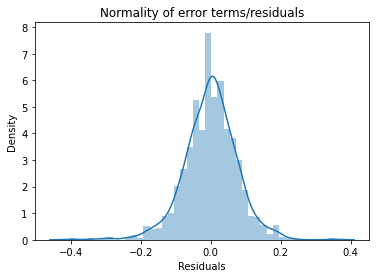

In [54]:
# plot of residuals for train set
res_ridge= y_train_pred-y_train
sns.distplot(res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

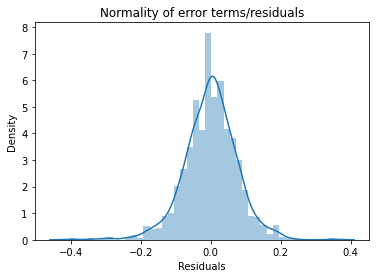

In [55]:
res_ridge_test= y_test_pred-y_test
sns.distplot(res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

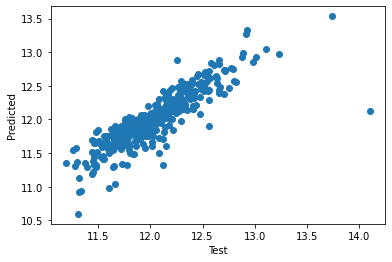

In [56]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show

## Lasso Regression

In [57]:
lasso=Lasso()
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.0001}
0.8409340683021934


In [59]:
alpha=0.0001
lasso= Lasso(alpha=alpha)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 0.88221197,  0.26612696,  0.41248326,  0.81983162, -0.57936552,
       -0.64853571,  0.45151676,  0.13058153,  0.1681685 ,  0.05725728,
        0.09993894,  0.0927433 ,  0.14400549,  0.1234522 ,  0.07853524,
        0.14961493,  0.16261889,  0.63307507,  0.5023138 ,  0.52813704,
        0.39747686,  0.13254961,  0.01327963,  0.05961207, -0.53798034,
       -0.57092529, -0.17800784, -0.3071664 , -0.33339394, -0.62107915])

In [60]:
y_train_pred= lasso.predict(X_train_rfe)
y_test_pred= lasso.predict(X_test_rfe)
r2_lasso_train= r2_score(y_train_pred,y_train)
print("R2 Score : {}".format(r2_lasso_train))
r2_lasso_test= r2_score(y_test_pred,y_test)
print("R2 Score : {}".format(r2_lasso_test))
mse_lasso_train= mean_squared_error(y_train_pred,y_train)
print("MSE Score : {}".format(mse_lasso_train))
mse_lasso_test= mean_squared_error(y_test_pred,y_test)
print("MSE Score : {}".format(mse_lasso_test))
rss_lasso_train = np.sum(np.square(y_train - y_train_pred))
print("RSS Score Lasso Train : {}".format(rss_lasso_train))
rss_lasso_test = np.sum(np.square(y_test - y_test_pred))
print("RSS Score Lasso Test: {}".format(rss_lasso_test))

metrics['Lasso']=[r2_lasso_train, r2_lasso_test, mse_lasso_train, mse_lasso_test,rss_lasso_train, rss_lasso_test]
metrics

R2 Score : 0.8393573410788713
R2 Score : 0.7313049457595292
MSE Score : 0.02156580532432419
MSE Score : 0.03868588940024162
RSS Score Lasso Train : 21.716765961594458
RSS Score Lasso Test: 16.71230422090438


Metrics  Linear Regression   LR with RFE      Ridge      Lasso
0   R2_train       9.641686e-01  8.640582e-01   0.837827   0.839357
1    R2_test      -1.102638e+20  7.516703e-01   0.837827   0.731305
2  MSE_train       5.655146e-03  2.145521e-02   0.021631   0.021566
3   MSE_test       1.726211e+19  3.887671e-02   0.038620   0.038686
4  RSS_Train       5.694732e+00  5.694732e+00  21.782337  21.716766
5   RSS_Test       7.457233e+21  7.457233e+21  16.683685  16.712304

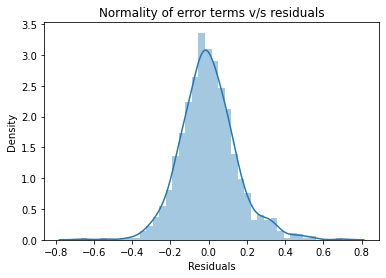

In [61]:
# plot of residuals for train set
res_lasso= y_train_pred-y_train
sns.distplot(res_lasso,kde=True)
plt.title('Normality of error terms v/s residuals')
plt.xlabel("Residuals")
plt.show()

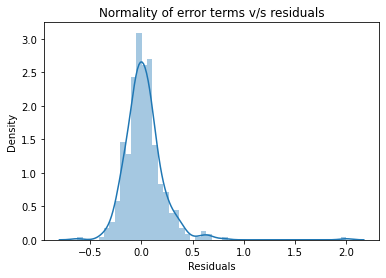

In [62]:
#test residuals
res_lasso_test= y_test_pred-y_test
sns.distplot(res_lasso_test,kde=True)
plt.title('Normality of error terms v/s residuals')
plt.xlabel("Residuals")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

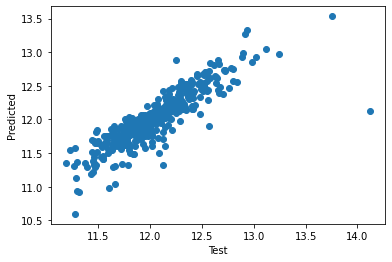

In [63]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show

## Regression Coeff comparison

In [64]:
coef = pd.DataFrame(columns=['Beta','Ridge','Lasso'])
coef['Beta'] = X_train_rfe.columns
coef['Ridge']=ridge.coef_
coef['Lasso']=lasso.coef_
coef

Beta     Ridge     Lasso
0                                         TotalBsmtSF  0.859191  0.882212
1                                            1stFlrSF  0.402588  0.266127
2                                            2ndFlrSF  0.513689  0.412483
3                                           GrLivArea  0.626126  0.819832
4                                        BedroomAbvGr -0.554926 -0.579366
5                                        KitchenAbvGr -0.629153 -0.648536
6                                          GarageCars  0.453207  0.451517
7          MSSubClass_1-STORY 1946 & NEWER ALL STYLES  0.134435  0.130582
8   MSSubClass_1-STORY PUD (Planned Unit Developme...  0.176002  0.168169
9        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  0.087125  0.057257
10  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  0.100449  0.099939
11                    MSSubClass_2-STORY 1945 & OLDER  0.096601  0.092743
12                    MSSubClass_2-STORY 1946 & NEWER  0.147784  0.144005
13            MSSubClass_DUPLEX - ALL STYLES AND AGES  0.066730  0.123452
14  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...  0.092360  0.078535
15                             MSSubClass_SPLIT FOYER  0.156516  0.149615
16                    MSSubClass_SPLIT OR MULTI-LEVEL  0.165878  0.162619
17                                        MSZoning_FV  0.598117  0.633075
18                                        MSZoning_RH  0.460870  0.502314
19                                        MSZoning_RL  0.491673  0.528137
20                                        MSZoning_RM  0.362303  0.397477
21                                    Condition2_PosA  0.183301  0.132550
22                                    BldgType_Duplex  0.066730  0.013280
23                                  HouseStyle_1.5Unf  0.072272  0.059612
24                              OverallQual_Very Poor -0.508211 -0.537980
25                                Exterior1st_BrkComm -0.542641 -0.570925
26                                 Exterior2nd_CBlock -0.209037 -0.178008
27                                       Heating_Grav -0.307206 -0.307166
28                                    Functional_Maj2 -0.330387 -0.333394
29                                     Functional_Sev -0.555159 -0.621079

In [65]:
coef_sorted_absolute = coef.sort_values(by=['Lasso'],ascending=False,key=pd.Series.abs)
coef_sorted_absolute

Beta     Ridge     Lasso
0                                         TotalBsmtSF  0.859191  0.882212
3                                           GrLivArea  0.626126  0.819832
5                                        KitchenAbvGr -0.629153 -0.648536
17                                        MSZoning_FV  0.598117  0.633075
29                                     Functional_Sev -0.555159 -0.621079
4                                        BedroomAbvGr -0.554926 -0.579366
25                                Exterior1st_BrkComm -0.542641 -0.570925
24                              OverallQual_Very Poor -0.508211 -0.537980
19                                        MSZoning_RL  0.491673  0.528137
18                                        MSZoning_RH  0.460870  0.502314
6                                          GarageCars  0.453207  0.451517
2                                            2ndFlrSF  0.513689  0.412483
20                                        MSZoning_RM  0.362303  0.397477
28                                    Functional_Maj2 -0.330387 -0.333394
27                                       Heating_Grav -0.307206 -0.307166
1                                            1stFlrSF  0.402588  0.266127
26                                 Exterior2nd_CBlock -0.209037 -0.178008
8   MSSubClass_1-STORY PUD (Planned Unit Developme...  0.176002  0.168169
16                    MSSubClass_SPLIT OR MULTI-LEVEL  0.165878  0.162619
15                             MSSubClass_SPLIT FOYER  0.156516  0.149615
12                    MSSubClass_2-STORY 1946 & NEWER  0.147784  0.144005
21                                    Condition2_PosA  0.183301  0.132550
7          MSSubClass_1-STORY 1946 & NEWER ALL STYLES  0.134435  0.130582
13            MSSubClass_DUPLEX - ALL STYLES AND AGES  0.066730  0.123452
10  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  0.100449  0.099939
11                    MSSubClass_2-STORY 1945 & OLDER  0.096601  0.092743
14  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...  0.092360  0.078535
23                                  HouseStyle_1.5Unf  0.072272  0.059612
9        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  0.087125  0.057257
22                                    BldgType_Duplex  0.066730  0.013280

In [66]:
coef_sorted_absolute[:15]

Beta     Ridge     Lasso
0             TotalBsmtSF  0.859191  0.882212
3               GrLivArea  0.626126  0.819832
5            KitchenAbvGr -0.629153 -0.648536
17            MSZoning_FV  0.598117  0.633075
29         Functional_Sev -0.555159 -0.621079
4            BedroomAbvGr -0.554926 -0.579366
25    Exterior1st_BrkComm -0.542641 -0.570925
24  OverallQual_Very Poor -0.508211 -0.537980
19            MSZoning_RL  0.491673  0.528137
18            MSZoning_RH  0.460870  0.502314
6              GarageCars  0.453207  0.451517
2                2ndFlrSF  0.513689  0.412483
20            MSZoning_RM  0.362303  0.397477
28        Functional_Maj2 -0.330387 -0.333394
27           Heating_Grav -0.307206 -0.307166

## Subjective Questions

### Question 1
What is the optimal value of alpha for ridge and lasso regression?
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
What will be the most important predictor variables after the change is implemented?

### Optimal Alpha Values
 #### Ridge : 0.3
 #### Lasso : 0.0001

### Ridge with alpha doubled

In [67]:
alpha=0.6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.83619525,  0.41960898,  0.50114254,  0.60152717, -0.50735602,
       -0.5556963 ,  0.46166079,  0.13004775,  0.17754958,  0.08452868,
        0.08005714,  0.09663839,  0.15029213,  0.05259969,  0.09224867,
        0.14962648,  0.16002889,  0.52177201,  0.37275041,  0.41501072,
        0.28495787,  0.15694017,  0.05259969,  0.06557066, -0.44492702,
       -0.48141529, -0.165407  , -0.28813366, -0.30294596, -0.44909091])

In [68]:
y_train_pred = ridge.predict(X_train_rfe)
y_test_pred= ridge.predict(X_test_rfe)
r2_scoretr = r2_score(y_train_pred, y_train )
r2_scoretr

0.8325042535953902

In [69]:
r2_scorets = r2_score(y_test_pred, y_test )
r2_scorets

0.7253874081130254

In [70]:
q1_rdf = pd.DataFrame(columns=['Beta','New_ridge'])
q1_rdf['Beta']=X_train_rfe.columns
q1_rdf['New_ridge']= ridge.coef_

In [71]:
sorted_df = q1_rdf.sort_values(by=['New_ridge'],ascending=False,key=pd.Series.abs)
sorted_df

Beta  New_ridge
0                                         TotalBsmtSF   0.836195
3                                           GrLivArea   0.601527
5                                        KitchenAbvGr  -0.555696
17                                        MSZoning_FV   0.521772
4                                        BedroomAbvGr  -0.507356
2                                            2ndFlrSF   0.501143
25                                Exterior1st_BrkComm  -0.481415
6                                          GarageCars   0.461661
29                                     Functional_Sev  -0.449091
24                              OverallQual_Very Poor  -0.444927
1                                            1stFlrSF   0.419609
19                                        MSZoning_RL   0.415011
18                                        MSZoning_RH   0.372750
28                                    Functional_Maj2  -0.302946
27                                       Heating_Grav  -0.288134
20                                        MSZoning_RM   0.284958
8   MSSubClass_1-STORY PUD (Planned Unit Developme...   0.177550
26                                 Exterior2nd_CBlock  -0.165407
16                    MSSubClass_SPLIT OR MULTI-LEVEL   0.160029
21                                    Condition2_PosA   0.156940
12                    MSSubClass_2-STORY 1946 & NEWER   0.150292
15                             MSSubClass_SPLIT FOYER   0.149626
7          MSSubClass_1-STORY 1946 & NEWER ALL STYLES   0.130048
11                    MSSubClass_2-STORY 1945 & OLDER   0.096638
14  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...   0.092249
9        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES   0.084529
10  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...   0.080057
23                                  HouseStyle_1.5Unf   0.065571
22                                    BldgType_Duplex   0.052600
13            MSSubClass_DUPLEX - ALL STYLES AND AGES   0.052600

In [74]:
sorted_df[:10]

Beta  New_ridge
0             TotalBsmtSF   0.836195
3               GrLivArea   0.601527
5            KitchenAbvGr  -0.555696
17            MSZoning_FV   0.521772
4            BedroomAbvGr  -0.507356
2                2ndFlrSF   0.501143
25    Exterior1st_BrkComm  -0.481415
6              GarageCars   0.461661
29         Functional_Sev  -0.449091
24  OverallQual_Very Poor  -0.444927

In [75]:
y_train_pred=ridge.predict(X_train_rfe)
y_test_pred=ridge.predict(X_test_rfe)
r2_ridge_train= r2_score(y_train_pred,y_train)
print(r2_ridge_train)
r2_ridge_test= r2_score(y_test_pred,y_test)
print(r2_ridge_test)
mse_ridge_train= mean_squared_error(y_train_pred,y_train)
print(mse_ridge_train)
mse_ridge_test= mean_squared_error(y_test_pred,y_test)
print(mse_ridge_test)
rss_ridge_train = np.sum(np.square(y_train - y_train_pred))
print("RSS Score Ridge Train New: {}".format(rss_ridge_train))
rss_ridge_test = np.sum(np.square(y_test - y_test_pred))
print("RSS Score Ridge Test New : {}".format(rss_ridge_test))

0.8325042535953902
0.7253874081130254
0.02196727702143307
0.03857488021401808
RSS Score Ridge Train New: 22.121047960583102
RSS Score Ridge Test New : 16.66434825245581


## Lasso with alpha doubled

In [76]:
alpha=0.0002
lasso= Lasso(alpha=alpha)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 0.88099524,  0.19267223,  0.33330007,  0.9196113 , -0.54364985,
       -0.57373369,  0.46003116,  0.12165608,  0.16295831,  0.02749655,
        0.07297124,  0.08869713,  0.14259855,  0.09093152,  0.06630897,
        0.13535043,  0.15285605,  0.5529314 ,  0.41166379,  0.44909978,
        0.31671641,  0.04097754,  0.01344692,  0.03989812, -0.48247301,
       -0.51913718, -0.07521619, -0.28397068, -0.30265755, -0.51632717])

In [77]:
q1_ldf = pd.DataFrame(columns=['Beta','New_lasso'])
q1_ldf['Beta']=X_train_rfe.columns
q1_ldf['New_lasso']= lasso.coef_
# sort by absolute values
sorted_df_lasso= q1_ldf.sort_values(by=['New_lasso'],ascending=False,key=pd.Series.abs)
sorted_df_lasso

Beta  New_lasso
3                                           GrLivArea   0.919611
0                                         TotalBsmtSF   0.880995
5                                        KitchenAbvGr  -0.573734
17                                        MSZoning_FV   0.552931
4                                        BedroomAbvGr  -0.543650
25                                Exterior1st_BrkComm  -0.519137
29                                     Functional_Sev  -0.516327
24                              OverallQual_Very Poor  -0.482473
6                                          GarageCars   0.460031
19                                        MSZoning_RL   0.449100
18                                        MSZoning_RH   0.411664
2                                            2ndFlrSF   0.333300
20                                        MSZoning_RM   0.316716
28                                    Functional_Maj2  -0.302658
27                                       Heating_Grav  -0.283971
1                                            1stFlrSF   0.192672
8   MSSubClass_1-STORY PUD (Planned Unit Developme...   0.162958
16                    MSSubClass_SPLIT OR MULTI-LEVEL   0.152856
12                    MSSubClass_2-STORY 1946 & NEWER   0.142599
15                             MSSubClass_SPLIT FOYER   0.135350
7          MSSubClass_1-STORY 1946 & NEWER ALL STYLES   0.121656
13            MSSubClass_DUPLEX - ALL STYLES AND AGES   0.090932
11                    MSSubClass_2-STORY 1945 & OLDER   0.088697
26                                 Exterior2nd_CBlock  -0.075216
10  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...   0.072971
14  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...   0.066309
21                                    Condition2_PosA   0.040978
23                                  HouseStyle_1.5Unf   0.039898
9        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES   0.027497
22                                    BldgType_Duplex   0.013447

In [78]:
sorted_df_lasso[:10]

Beta  New_lasso
3               GrLivArea   0.919611
0             TotalBsmtSF   0.880995
5            KitchenAbvGr  -0.573734
17            MSZoning_FV   0.552931
4            BedroomAbvGr  -0.543650
25    Exterior1st_BrkComm  -0.519137
29         Functional_Sev  -0.516327
24  OverallQual_Very Poor  -0.482473
6              GarageCars   0.460031
19            MSZoning_RL   0.449100

In [79]:
y_train_pred= lasso.predict(X_train_rfe)
y_test_pred= lasso.predict(X_test_rfe)
r2_lasso_train= r2_score(y_train_pred,y_train)
print(r2_lasso_train)
r2_lasso_test= r2_score(y_test_pred,y_test)
print(r2_lasso_test)
mse_lasso_train= mean_squared_error(y_train_pred,y_train)
print(mse_lasso_train)
mse_lasso_test= mean_squared_error(y_test_pred,y_test)
print(mse_lasso_test)
rss_lasso_train = np.sum(np.square(y_train - y_train_pred))
print("RSS Score Lasso Train New: {}".format(rss_lasso_train))
rss_lasso_test = np.sum(np.square(y_test - y_test_pred))
print("RSS Score Lasso Test New: {}".format(rss_lasso_test))

0.8345295684733254
0.72718007113085
0.02189868015395355
0.038720965276177015
RSS Score Lasso Train New: 22.051970915031227
RSS Score Lasso Test New: 16.72745699930847


In [80]:
# model with doubled alpha
coef['new_ridge']=q1_rdf['New_ridge']
coef['new_lasso']=q1_ldf['New_lasso']
coef

Beta     Ridge     Lasso  \
0                                         TotalBsmtSF  0.859191  0.882212   
1                                            1stFlrSF  0.402588  0.266127   
2                                            2ndFlrSF  0.513689  0.412483   
3                                           GrLivArea  0.626126  0.819832   
4                                        BedroomAbvGr -0.554926 -0.579366   
5                                        KitchenAbvGr -0.629153 -0.648536   
6                                          GarageCars  0.453207  0.451517   
7          MSSubClass_1-STORY 1946 & NEWER ALL STYLES  0.134435  0.130582   
8   MSSubClass_1-STORY PUD (Planned Unit Developme...  0.176002  0.168169   
9        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  0.087125  0.057257   
10  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  0.100449  0.099939   
11                    MSSubClass_2-STORY 1945 & OLDER  0.096601  0.092743   
12                    MSSubClass_2-STORY 1946 & NEWER  0.147784  0.144005   
13            MSSubClass_DUPLEX - ALL STYLES AND AGES  0.066730  0.123452   
14  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...  0.092360  0.078535   
15                             MSSubClass_SPLIT FOYER  0.156516  0.149615   
16                    MSSubClass_SPLIT OR MULTI-LEVEL  0.165878  0.162619   
17                                        MSZoning_FV  0.598117  0.633075   
18                                        MSZoning_RH  0.460870  0.502314   
19                                        MSZoning_RL  0.491673  0.528137   
20                                        MSZoning_RM  0.362303  0.397477   
21                                    Condition2_PosA  0.183301  0.132550   
22                                    BldgType_Duplex  0.066730  0.013280   
23                                  HouseStyle_1.5Unf  0.072272  0.059612   
24                              OverallQual_Very Poor -0.508211 -0.537980   
25                                Exterior1st_BrkComm -0.542641 -0.570925   
26                                 Exterior2nd_CBlock -0.209037 -0.178008   
27                                       Heating_Grav -0.307206 -0.307166   
28                                    Functional_Maj2 -0.330387 -0.333394   
29                                     Functional_Sev -0.555159 -0.621079   

    new_ridge  new_lasso  
0    0.836195   0.880995  
1    0.419609   0.192672  
2    0.501143   0.333300  
3    0.601527   0.919611  
4   -0.507356  -0.543650  
5   -0.555696  -0.573734  
6    0.461661   0.460031  
7    0.130048   0.121656  
8    0.177550   0.162958  
9    0.084529   0.027497  
10   0.080057   0.072971  
11   0.096638   0.088697  
12   0.150292   0.142599  
13   0.052600   0.090932  
14   0.092249   0.066309  
15   0.149626   0.135350  
16   0.160029   0.152856  
17   0.521772   0.552931  
18   0.372750   0.411664  
19   0.415011   0.449100  
20   0.284958   0.316716  
21   0.156940   0.040978  
22   0.052600   0.013447  
23   0.065571   0.039898  
24  -0.444927  -0.482473  
25  -0.481415  -0.519137  
26  -0.165407  -0.075216  
27  -0.288134  -0.283971  
28  -0.302946  -0.302658  
29  -0.449091  -0.516327

### Question 3
After building the model, you realised that the five most important predictor variables in the 
lasso model are not available in the incoming data. 
You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?


In [81]:
coef_sorted_absolute[:5]

Beta     Ridge     Lasso
0      TotalBsmtSF  0.859191  0.882212
3        GrLivArea  0.626126  0.819832
5     KitchenAbvGr -0.629153 -0.648536
17     MSZoning_FV  0.598117  0.633075
29  Functional_Sev -0.555159 -0.621079

In [82]:
X_train_rfe_n =X_train_rfe.drop(columns=['TotalBsmtSF','GrLivArea','KitchenAbvGr','MSZoning_FV','Functional_Sev'],axis=1)
X_test_rfe_n=X_test_rfe.drop(columns=['TotalBsmtSF','GrLivArea','KitchenAbvGr','MSZoning_FV','Functional_Sev'],axis=1)

In [83]:
X_train_rfe_n.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosA',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'OverallQual_Very Poor',
       'Exterior1st_BrkComm', 'Exterior2nd_CBlock', 'Heating_Grav',
       'Functional_Maj2'],
      dtype='object')

In [84]:
alpha=0.0002
lasso_nw= Lasso(alpha=alpha)
lasso_nw.fit(X_train_rfe_n,y_train)
lasso_nw.coef_

array([ 1.27641541,  0.77592473, -0.50230152,  0.53731937,  0.13867885,
        0.20019551,  0.080824  , -0.05030157,  0.07968609,  0.17499951,
       -0.10787772,  0.05417608,  0.13057494,  0.11725669, -0.06639556,
       -0.04628744, -0.17671709,  0.05276316, -0.        ,  0.03647535,
       -0.53366873, -0.63701218, -0.02897941, -0.25204732, -0.31787364])

In [85]:
q3_ldf = pd.DataFrame(columns=['Beta','New_lasso'])
q3_ldf['Beta']=X_train_rfe_n.columns
q3_ldf['New_lasso']= lasso_nw.coef_
# sort by absolute values
sorted_df_lasso_n= q3_ldf.sort_values(by=['New_lasso'],ascending=False,key=pd.Series.abs)
sorted_df_lasso_n

Beta  New_lasso
0                                            1stFlrSF   1.276415
1                                            2ndFlrSF   0.775925
21                                Exterior1st_BrkComm  -0.637012
3                                          GarageCars   0.537319
20                              OverallQual_Very Poor  -0.533669
2                                        BedroomAbvGr  -0.502302
24                                    Functional_Maj2  -0.317874
23                                       Heating_Grav  -0.252047
5   MSSubClass_1-STORY PUD (Planned Unit Developme...   0.200196
16                                        MSZoning_RM  -0.176717
9                     MSSubClass_2-STORY 1946 & NEWER   0.175000
4          MSSubClass_1-STORY 1946 & NEWER ALL STYLES   0.138679
12                             MSSubClass_SPLIT FOYER   0.130575
13                    MSSubClass_SPLIT OR MULTI-LEVEL   0.117257
10            MSSubClass_DUPLEX - ALL STYLES AND AGES  -0.107878
6        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES   0.080824
8                     MSSubClass_2-STORY 1945 & OLDER   0.079686
14                                        MSZoning_RH  -0.066396
11  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...   0.054176
17                                    Condition2_PosA   0.052763
7   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  -0.050302
15                                        MSZoning_RL  -0.046287
19                                  HouseStyle_1.5Unf   0.036475
22                                 Exterior2nd_CBlock  -0.028979
18                                    BldgType_Duplex  -0.000000

In [86]:
# Five Most important predictor variables now 
sorted_df_lasso_n[:5]

Beta  New_lasso
0                1stFlrSF   1.276415
1                2ndFlrSF   0.775925
21    Exterior1st_BrkComm  -0.637012
3              GarageCars   0.537319
20  OverallQual_Very Poor  -0.533669

## Observations

#### Optimal Value of Alpha for Ridge: 0.3
#### Optimal Value of Alpha for Lasso: 0.0001 

### Ridge and Lasso Coefficients

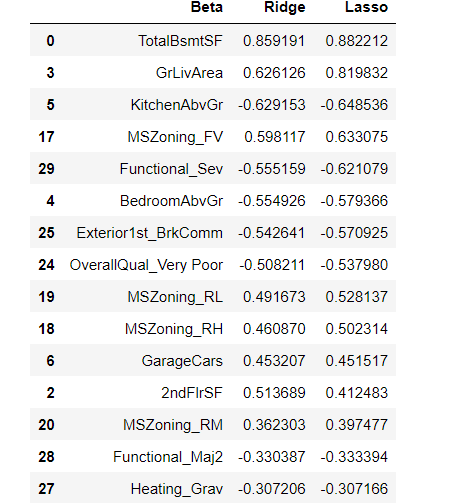

Top 5 predictor values are 
- TotalBsmtSF
- GrLivArea
- KitchenAbvGr
- MSZoning_FV
- Functional_Sev
